<a href="https://colab.research.google.com/github/scaleracademy/dsml-course/blob/main/NLP_Lecs/L_91_Intro_to_Attention_mechanisms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import string
import re
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import word2vec, FastText
import gensim.downloader
from sklearn.decomposition import PCA

## **Problem Statement**

- You are a data scientist in travel agency company.

- Your company is trying to figure out the sentiment of people about the  Hotel and Restaurant listed on their website on the basis of entity present in the review itself.
-  so that they could rank the hotel and restaurant accordingly on their landing page.

- And they wanted to train you a ML model to solve the problem.

## **So, What kind of problem is it?**
- so, first thing it is clear that, it is a  sentiment analysis task.
-  but sentiment is based on entity presents in the review itself.
- so we have two input : 
  - First, is `review text`,
  - and Second, is an `entity text` on which we want sentiment analysis.

- This type of task is categorized as `Aspect based Sentiment Analysis` in ML.



### **what is 'aspect' in ML?**
- the way in which a problem, idea, etc., may be considered  

- like your goal is to do classification based on some aspect. see below examples.

```
INPUT = {'text': 'food is delicious but price is high',
             'aspect':'food', 
              
   }

   OUTPUT = {'aspect_Sentiment' : 'Positive'
                }

```
     



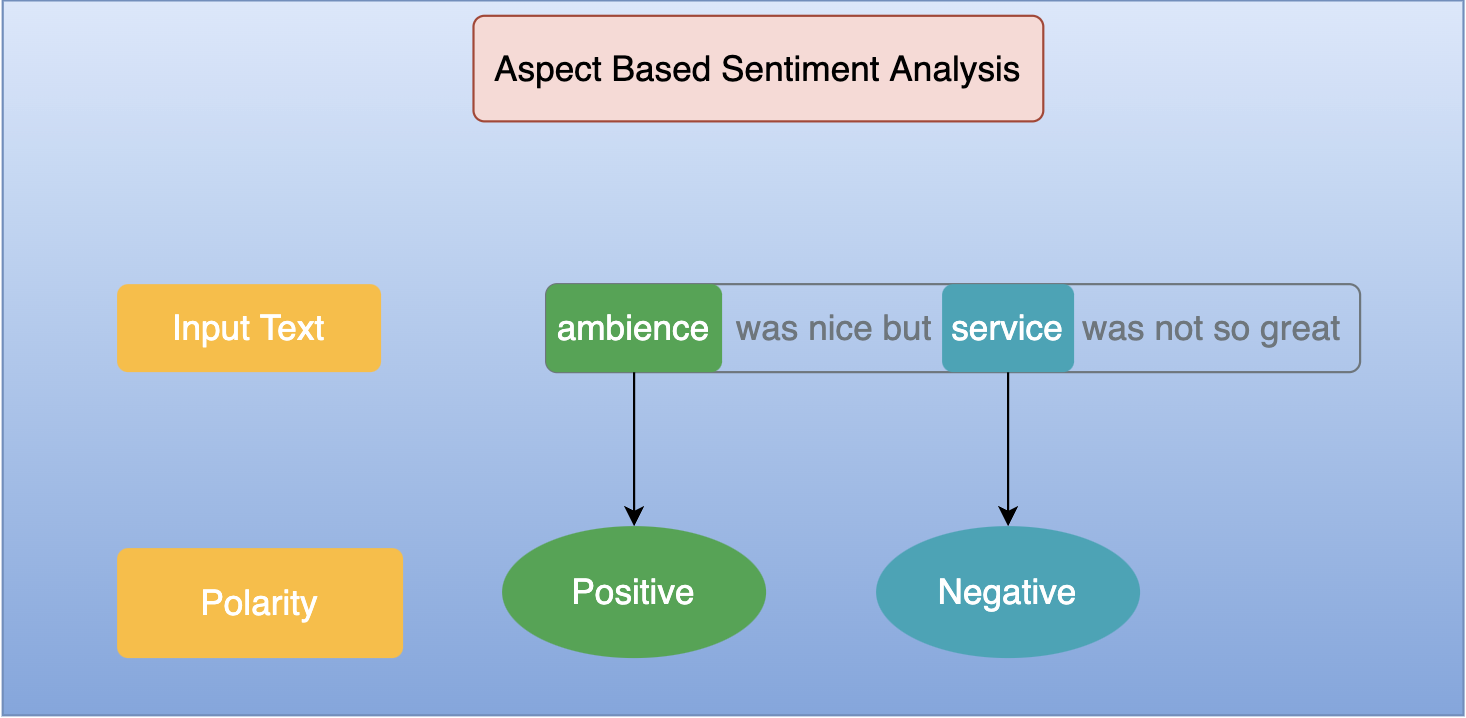

# **How we approach this problem?**

1. `Classification using LSTM.`
2. `Attention + LSTM Based Classification.`



# **1. Classification Using LSTM.**

- Take embedding of both Review Text and Aspect Text.
- Concate the embedding vectors into single sequence.
- Pass the output of concat layer to LSTM.
- LSTM followed by a couple of dense layer before final prediction.

## **How is the accuracy of Model?**
- After training, LSTM model acheives accuracy of 72%

## **How to improve the performance?**

- Using attention mechanisms.
- It acts like temprory memory for our model.

# **2. Classification Using LSTM + ATTENTION**



## **What is Attention Mechanisms**





>  " the action of taking special care of something." 






- The intuition behind attention can be best explained using human biological systems. 

- For example,
our visual processing system tends to focus selectively on some parts of the image, while ignoring
other irrelevant information in a manner that can assist in perception.   

- Similarly, in
several problems involving language, speech or vision, some parts of the input are more important
than others. 
```
Attention Mechanisms (AM) incorporates this notion of relevance by allowing the model to dynamically pay
attention to only certain parts of the input that help in 
performing the task at hand effectively. 
```
- An example of sentiment classification of Yelp reviews using AM is shown in
below figure. 
- In this example, the AM learns that out of five sentences, the first and third sentences
are more relevant. Furthermore, the words delicious and amazing within those sentences are more
meaningful to determine the sentiment of the review.

Screenshot 2022-04-25 at 3.19.48 AM.png

## **Why Attention Mechanisms?**


- These models are now the state-of-the-art for multiple tasks in

Domain | Task
--------|-----------
NLP | Machine Translation,Summarization, Sentiment Analysis, and Part-of-Speech tagging
Computer Vision | Image Classification, Object Detection, Image Generation 
Cross-Modal Tasks |  Multimedia Description, Visual Question Answering  and Recommender Systems 

- Improves `performance` on the main task. 

- Extensively used for improving `interpretability of
neural networks`, which are otherwise considered as black-box models. 

- Helps in debugging the `fairness`, `accountability`, and `transparency of Machine
Learning models` in applications that influence human lives. 

## **Why Attention + LSTM**

- Attention mechanisms help overcome some
challenges with Recurrent Neural Networks(RNNs) such as performance degradation with increase
in length of the input and the computational inefficiencies resulting from sequential processing of
input.

# **What is the Mathematical Representation of attentions?**

The core of the attention mechanism maps a
sequence $K$ of $n$ vectors,\
 $k_i$  the $Keys$, to a alighment distribution $a$ of $n$ weights $a_i$ . 

***Attention mechanisms Consist of following Componets:***
1. `Key(K)`
2. `Query(Q)`
3. `Value(V)`
4. `Energy Function(a)`
5. `Alignment distribution(g)`
6. `Final Representation(C)`

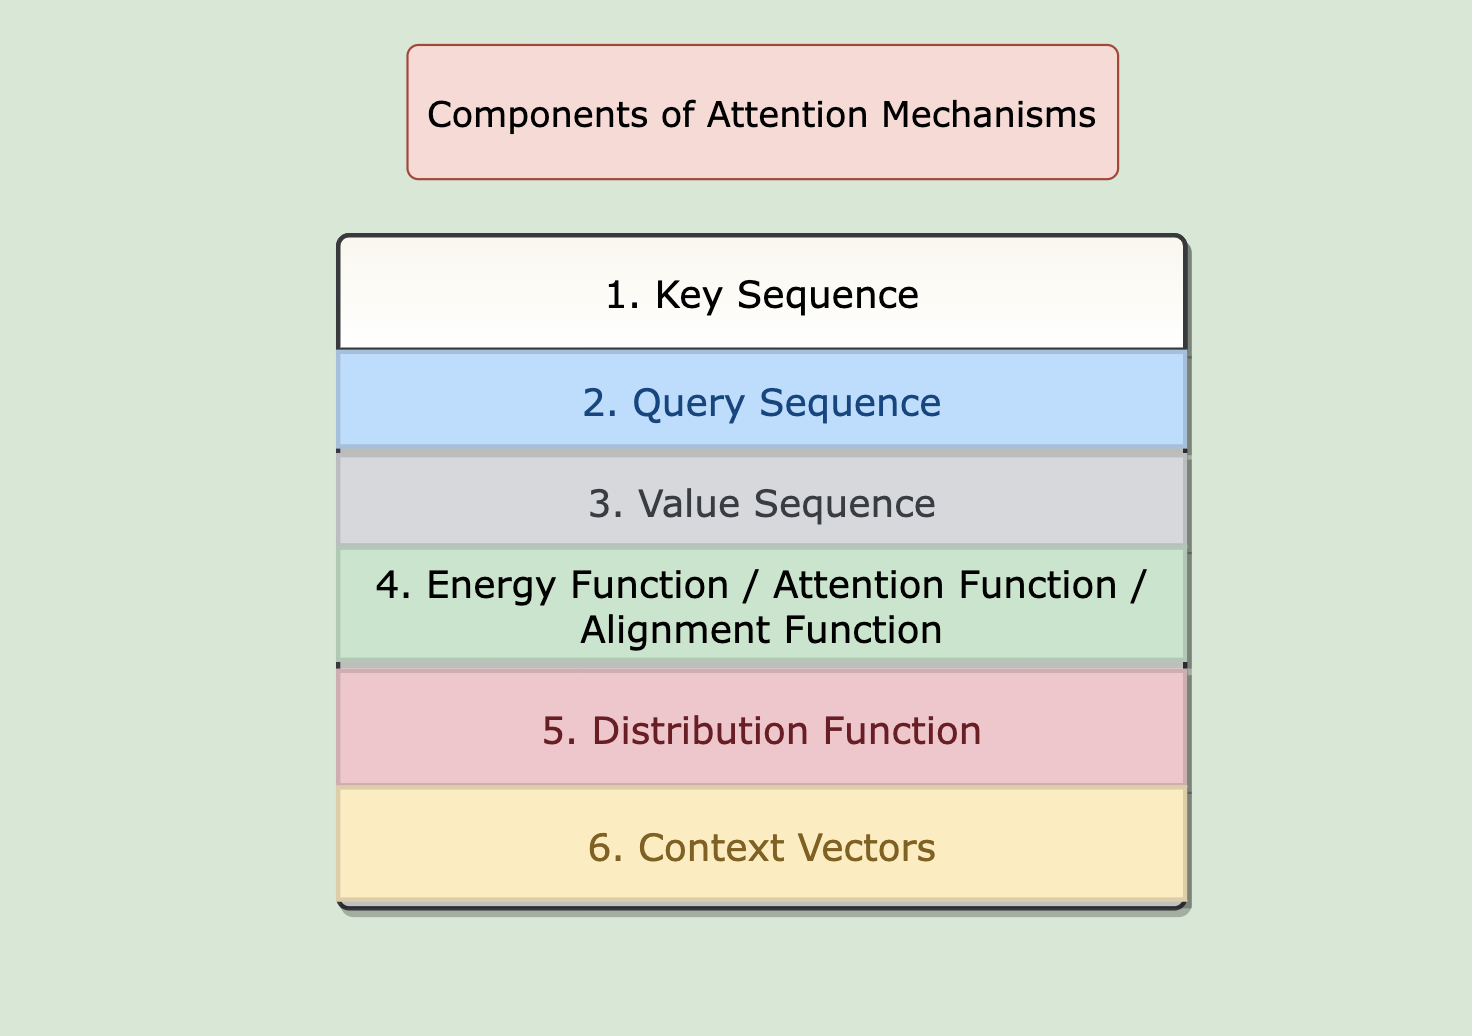

## **General Attention mechanisms Formula**

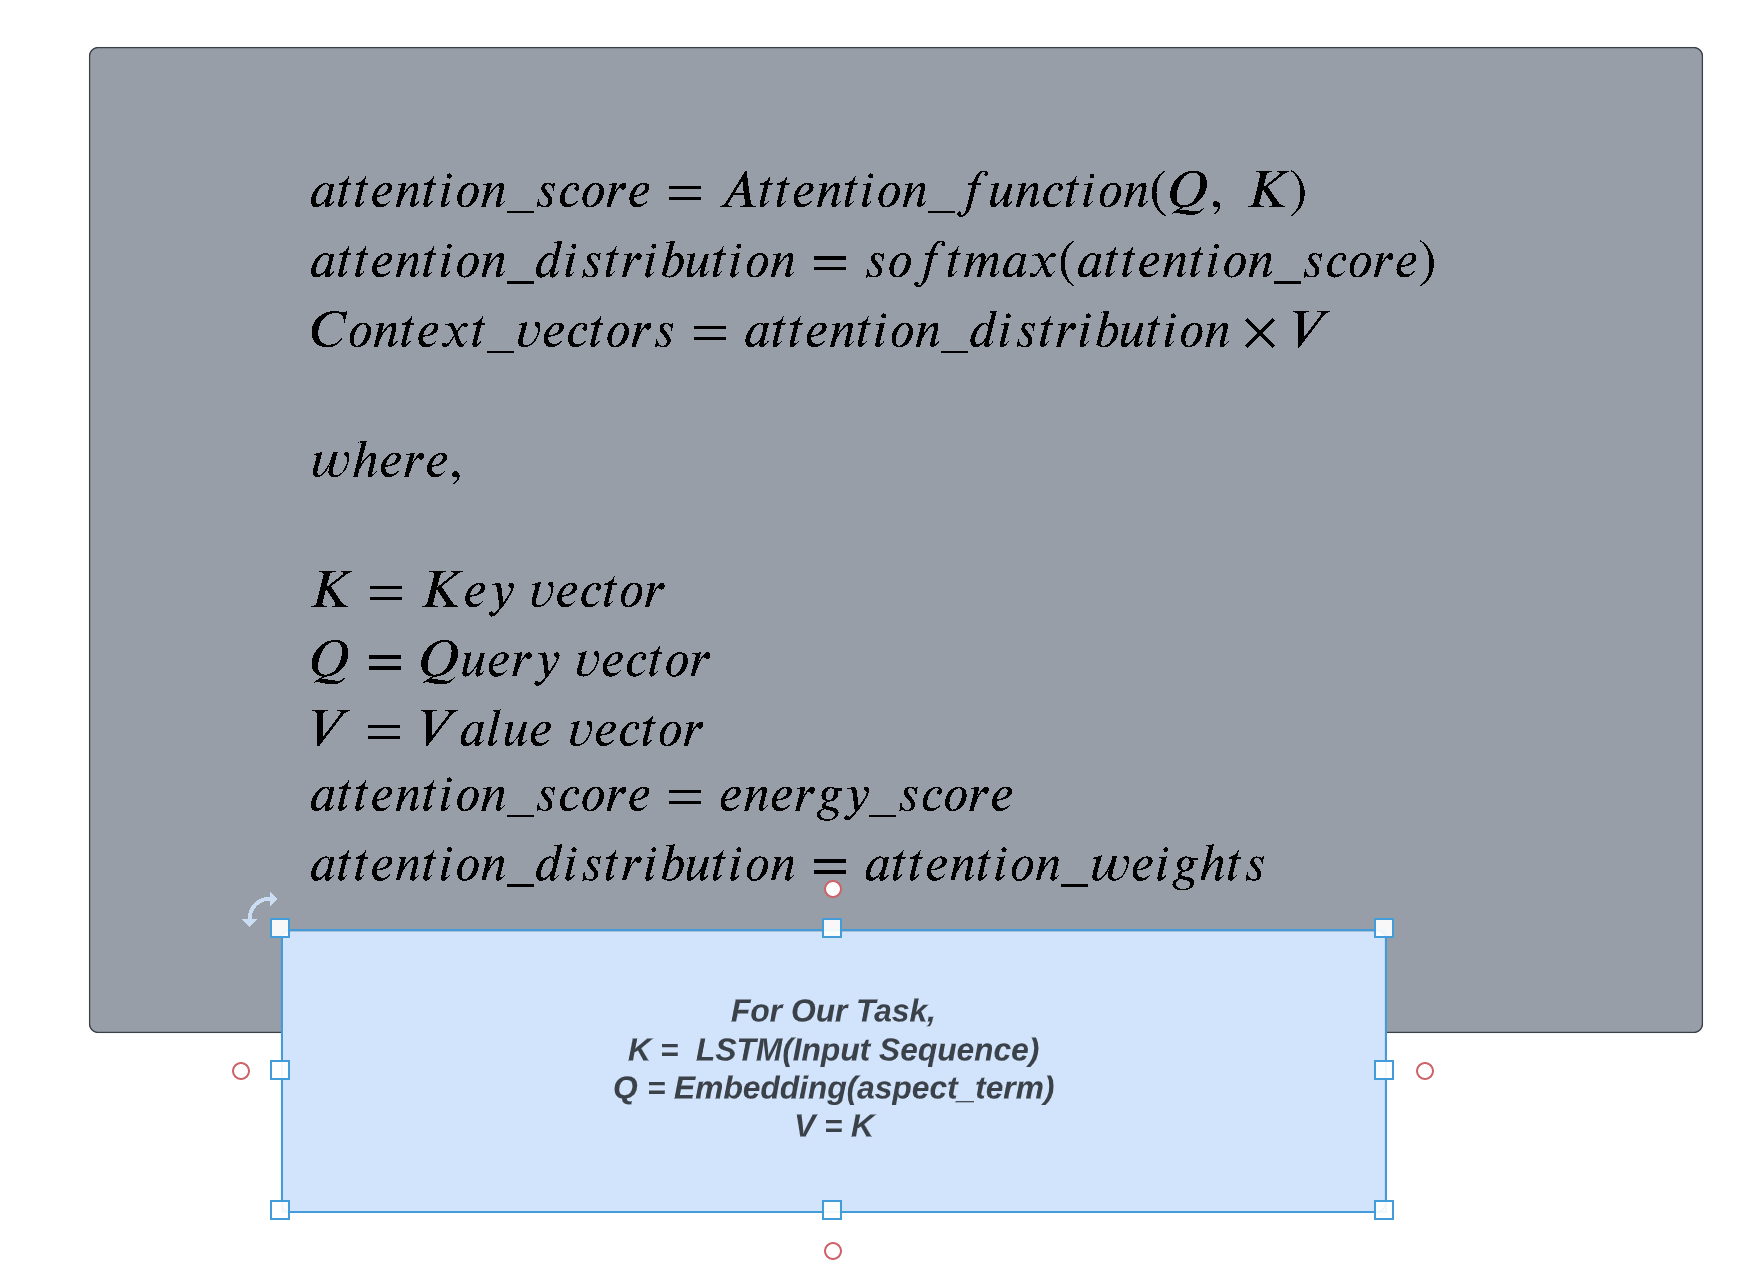



### **1. Key**
-  K encodes the data features whereupon
attention is computed.
-  $K$ may be word or
character embeddings of a document, or the internal states
of a recurrent architecture.

### **2. Query**
- Another input element called $Query$
is used as a reference when computing the attention distribution. 
- The attention mechanism will give emphasis
to the input elements relevant to the task according to $Q$. 
- $Q$ is represented by embeddings of actual textual queries, contextual information,etc.

### **3. Attention Function/ Energy function**

- also called as alignment function.
- From the $Keys$ and $Query$, a vector $E$ of $n$ energy scores/attention score $e_i$ 
is computed through a alignment function $\alpha$ 



   > $E = \alpha (Q, K)$

   > Function $\alpha$  called as  Attention function. 



  

### **4. Alignment Distribution**
- Attention scores are then transformed into attention weights using distribution function $g$


  >  $ W = g(E) $


- Such weights are the outcome of the core attention mechanism.
- The commonest distribution function is the softmax



  > $ W = Softmax(E) $

- Weights represent the relevance of
each element to the given task, with respect to $Q$  and $ K$.

### **5. Value**

- The computation of these weights may already be sufficient
for some tasks, such as the classification task.
-  Many tasks require the computation
of new representation of the keys. In such cases, it is common
to have another input element; a sequence $V$ of $n$ vectors
$v_i$ , the values, representing the data whereupon the attention
computed from $K$ and $Q$ is to be applied. 

### **6. Final Representation.**


  >  $ Z = W * V $

- Each element of $V$
corresponds to one and only one element of $K$, and the two can
be seen as different representations of the same data. 
- Indeed,
many architectures, do not distinguish
between $K$ and $V$. 
- $V$ and $W$ are thus combined to obtain a new set $Z$ of
weighted representations of $V$, 

- which are then
merged together so as to produce a compact representation

  > $z_i =  w_i * v_i, $

  > $C = \sum_{i=1}^{d_k} (z_i), $



# **How to compute attention?**




Ex - we have source sentence of 6 words and a target word , and we have to calculate attention score and context vector for target word.

-  Assume source sentence `food is delicious but price is high`
- target words `tasty`
- word `3` is similar in context to `target words`.






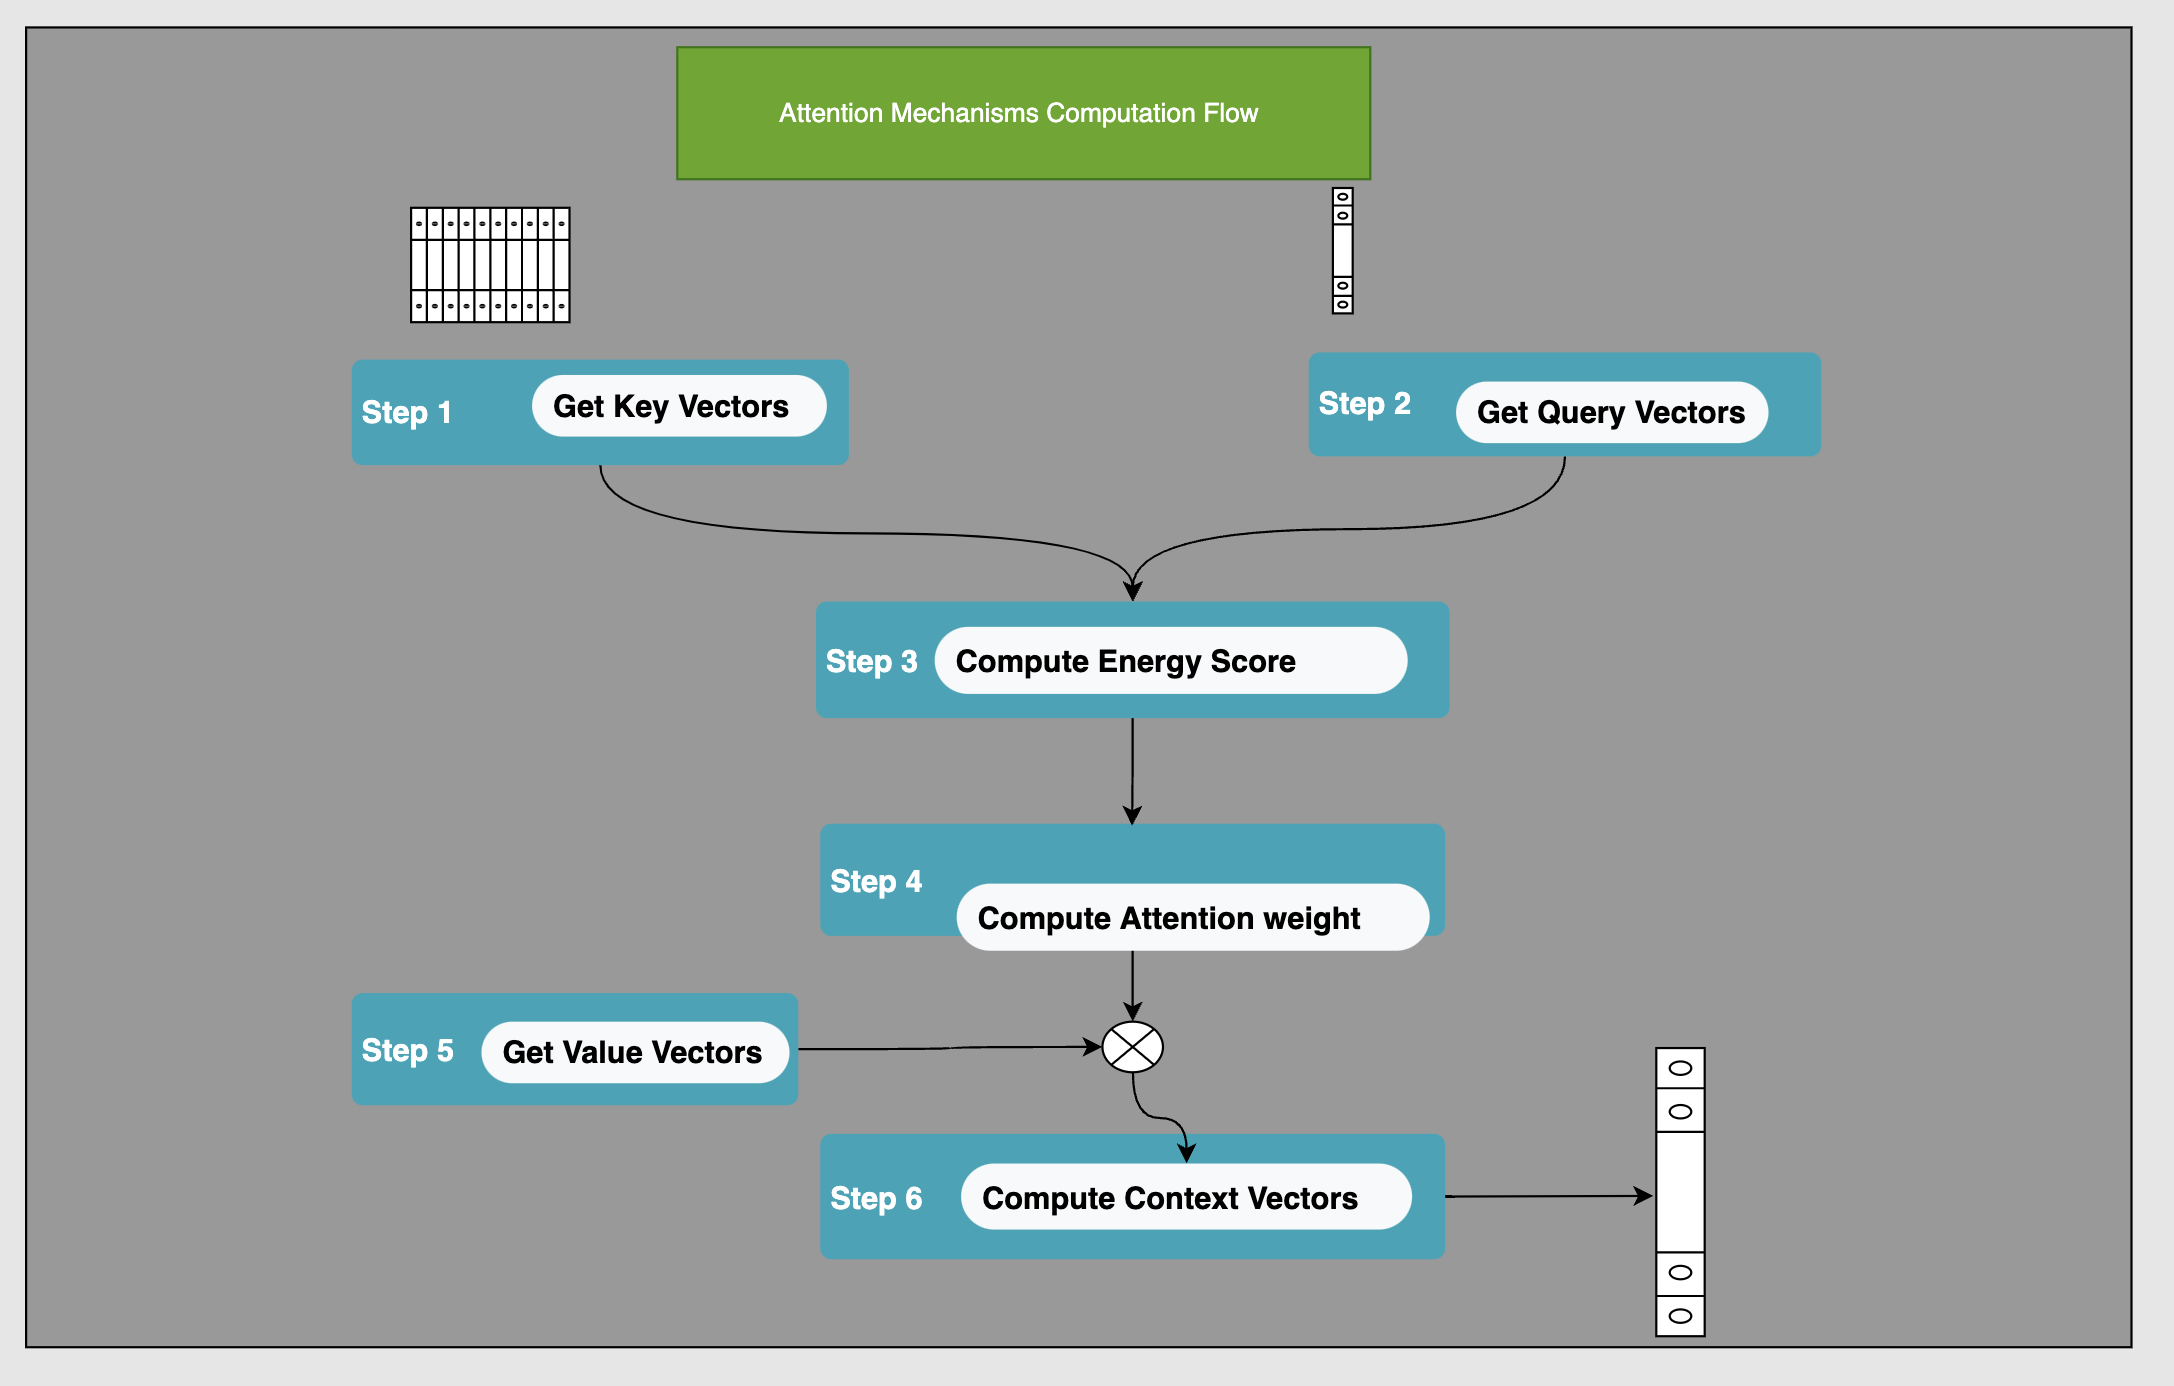

In [ ]:
#load glove word embedding vectors
glove_vectors = gensim.downloader.load('glove-twitter-25')

## **1. Get KEY**

> $Source Sentence $ = "food is delicious but price is high" \
$Tokenized$ = [food, is, delicious, but, price, is, high] \
$Key$ = $representation(Tokenized)$

Here, $representation$ is nothing but a word embedding model or output from recurrent model.


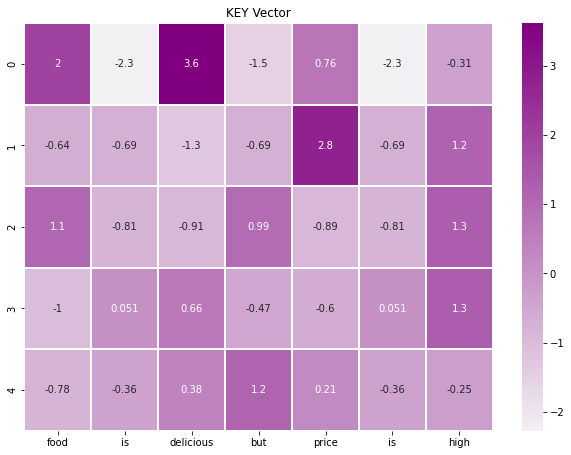

In [ ]:
#Input
sentences = ['food', 'is', 'delicious', 'but', 'price', 'is', 'high']

#Dimensionality reduction for easy visualization.
pca = PCA(n_components=5)

# Key sequence
KEY = [glove_vectors[i].tolist() for i in sentences]
KEY = pca.fit_transform(KEY)

# PLot
plt.figure(figsize=(10.5, 7.5))
key_df = pd.DataFrame(np.transpose(np.matrix(KEY)), columns = sentences)
ax = sns.heatmap(key_df, annot=True, cmap=sns.light_palette("purple", as_cmap=True), linewidths=1, ).set_title('KEY Vector')

## **2. Get Query**


> $target$ = [tasty, cost]\
$QUERY$ = $representation(target)$

Here, $representation$ is nothing but a word embedding model.

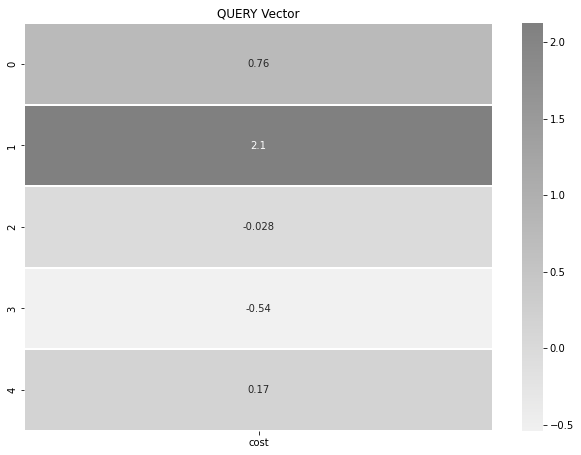

In [ ]:
#Query text
target = [ 'cost']

#Query embedding and dimensionality reduction
QUERY = [glove_vectors[i].tolist() for i in target]
QUERY = pca.transform(QUERY)


#Plot
plt.figure(figsize=(10.5, 7.5))
query_df = pd.DataFrame(np.transpose(QUERY), columns = target)
ax = sns.heatmap(query_df, annot=True, cmap=sns.light_palette("grey", as_cmap=True), linewidths=1, ).set_title('QUERY Vector', )

## **3. Compute Energy Function.**

> Here, Energy Function is $Dot Product$.

In [ ]:
def compute_energy_function(vect, mat):
  # calculate energy/attention fuction 
  return np.matmul( mat, np.transpose(vect),)

ENERGY_SCORE = compute_energy_function(QUERY, KEY)
ENERGY_SCORE

array([[ 0.51131411],
       [-3.23661494],
       [-0.24969932],
       [-2.17613397],
       [ 6.85134696],
       [-3.23661494],
       [ 1.53640209]])

## **4. Compute Attention weights**

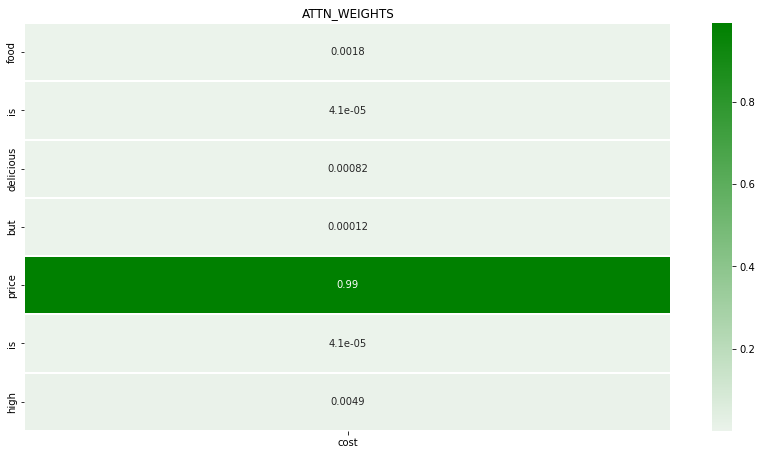

In [ ]:
def softmax(x):
    # Compute attention weights
    x = np.array(x, dtype=np.float64)
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=0)

ATTN_WEIGHTS = softmax(ENERGY_SCORE)

attn_df = pd.DataFrame(ATTN_WEIGHTS, index = sentences, columns = target)

plt.figure(figsize=(14.5, 7.5))
ax = sns.heatmap(attn_df , annot=True, cmap=sns.light_palette("green", as_cmap=True), linewidths=1).set_title('ATTN_WEIGHTS', )


## **5. VALUE**

Here, VALUE = KEY 

In [ ]:
VALUE = np.matrix(KEY)
VALUE[:,1].reshape(1,-1).tolist()
ATTN_WEIGHTS[:, 0][0]

0.0017507473188229517

## **6. Context Vectors**

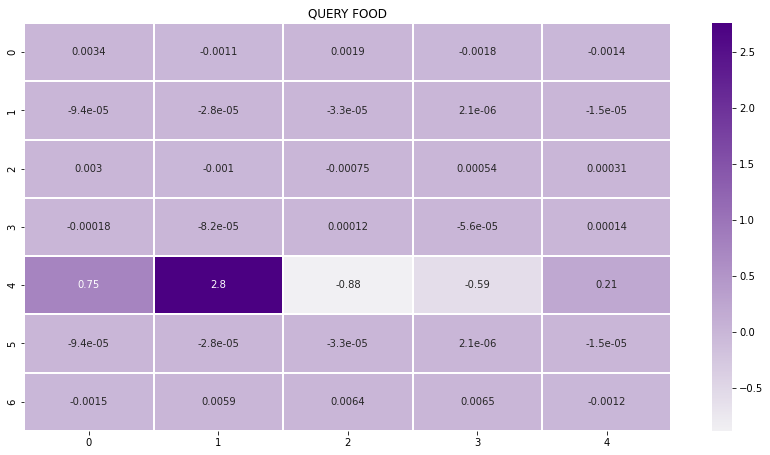

In [ ]:
def apply_attention_scores(attention_weights, annotations):
 # Multiple the annotations by their attention weights
 return  [  annotations[:, i] * attention_weights[i] for i in range(len(attention_weights))]


applied_attention_1 = apply_attention_scores(ATTN_WEIGHTS, np.transpose(VALUE))

plt.figure(figsize=(14.5, 7.5))
ax = sns.heatmap(np.array(applied_attention_1).reshape(7, 5), annot=True, cmap=sns.light_palette("indigo", as_cmap=True), linewidths=1).set_title('QUERY FOOD', )


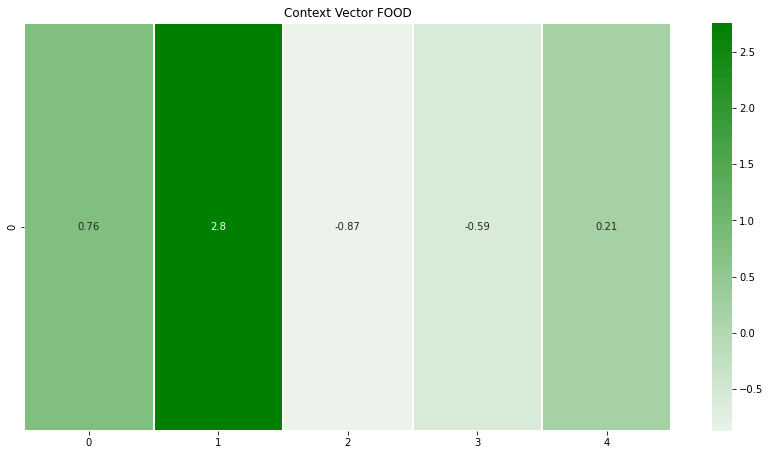

In [ ]:
def calculate_attention_vector(applied_attention):
 return np.sum(applied_attention, axis=0)

#applied_attention = np.array([[applied_attention_1]])
attention_vector = calculate_attention_vector(applied_attention_1)
plt.figure(figsize=(14.5, 7.5))
ax = sns.heatmap(np.transpose(np.matrix(attention_vector)), annot=True, cmap=sns.light_palette("Green", as_cmap=True), linewidths=1).set_title('Context Vector FOOD', )


# What are the different types of alignment function/ Energy function?


#### **1. Similarity based  Alignment functions**


1.   **Similarity e.g. Cosine Similarity**
2. **Dot Product**
3.   **Scaled Dot Product**



- These Alignment functions based on a notion of comparing query representations with key representations.
- compute either the cosine similarity or the dot product between the key and query representations.

- To account for varying lengths of representation, scaled dot product can be employed that normalizes the dot product by the representation vector length. 
- Note that these functions
assume that key and query have the same representation vector space.




$ \Large Attention\_Function \space               $                  | **$ \Large Equation \space        f(Q ,K)                    $**
------------------------|--------------------------------------------------
$\normalsize Similarity/(e.g. Cosine Sim)$ | $\Large Sim(Q,K)$
$ \normalsize Dot Product/Multiplicative$ | $ \Large  Q^TK$
$\normalsize Scaled\_Dot Product$ | $ \Large  \frac{Q^TK }{\sqrt{n}}$

#### **2. General alignment function**



1.   **General alignment**
2.   **Biased general alignment**
3.   Activated general alignment




- General alignment extends dot
product to keys and queries with different representations by introducing a learnable transformation
matrix $W$ that maps queries to the vector space of keys. 

- Biased general alignment allows to learn
the global importance of some keys irrespective of the query by introducing a bias term. 
- Activated
general alignment adds a nonlinear activation layer such as hyperbolic tangent, rectifier linear
unit, or scaled exponential linear unit. 



$ \Large Attention\_Function \space               $                  | **$ \Large Equation \space        f(Q ,K)                    $**
------------------------|--------------------------------------------------
$\normalsize General\_ alignment$ | $\Large Q^TWK$
$ \normalsize Biased\_ general\_ alignment$ | $ \Large  K^T(W \cdot Q + b)$
$\normalsize Activated\_ general\_ alignment$ | $ \Large  activation(Q^TWK + b)$


#### **3. Additive alignment function**



1.   **Concat**
2.   **Additive Alignment**
3.   **Deep alignment**


-  combine keys and query to form a joint representation.
-  Additive alignment reduces computational time by decoupling the contributions of the query and
the key
- allows precomputing contributions of all keys to avoid re-computation for each query.
- In contrast to a single neural layer used in additive alignment, deep alignment employs multiple
neural layers.


$ \Large Attention\_Function \space               $                  | **$ \Large Equation \space        f(Q ,K)                    $**
------------------------|--------------------------------------------------
$\normalsize Concat$ | $\Large W \cdot activation(W[K;Q] + b)$
$ \normalsize Additive\_ alignment$ | $ \Large  W \cdot activation(W_1 \cdot K + W_2 \cdot Q + b)$
$\normalsize Deep\_ alignment$ | $ \Large  W \cdot (E^{(L-1)} + B^L) \\ \large E^L = activation(W_lE^{(l-1)} + b^l)$


#### **4. Location-based alignment**
1.  **Convolution Based**
2. **Location Based**

- ignores the keys and only depends on q. The alignment score associated with each key
is thus computed as a function of the key’s position, independently of its content. 

- when working with group of items such as 2-D patches for images or 1-D temporal
sequences, 
- derived features (such as mean and standard deviation) from the representations of the
individual elements belonging to the group can be used as input to alignment functions 


$ \Large Attention\_Function \space               $                  | **$ \Large Equation \space        f(Q ,K)                    $**
------------------------|--------------------------------------------------
$\normalsize Location\_ Basedt$ | $\Large f(Q)$
$ \normalsize Convolution\_ Based$ | $ \Large  f(Q,K) = [e_0; e_1;;;;;e_{d_k}]
\\ \Large e_j = \frac{1}{l}\sum_{i=j-l}^{k}e_{i,j}
\\ \Large activation(W \cdot [k_i; k_{i+1};;;k_{i+l}] + b)$



# What are different type of Attention Mechanisms?

Attention Mechanisms can be broadly categorized into four category:

1. Number of Sequences.
2. Number of Abstraction.
3. Number of Position.
4. Number of Representation.

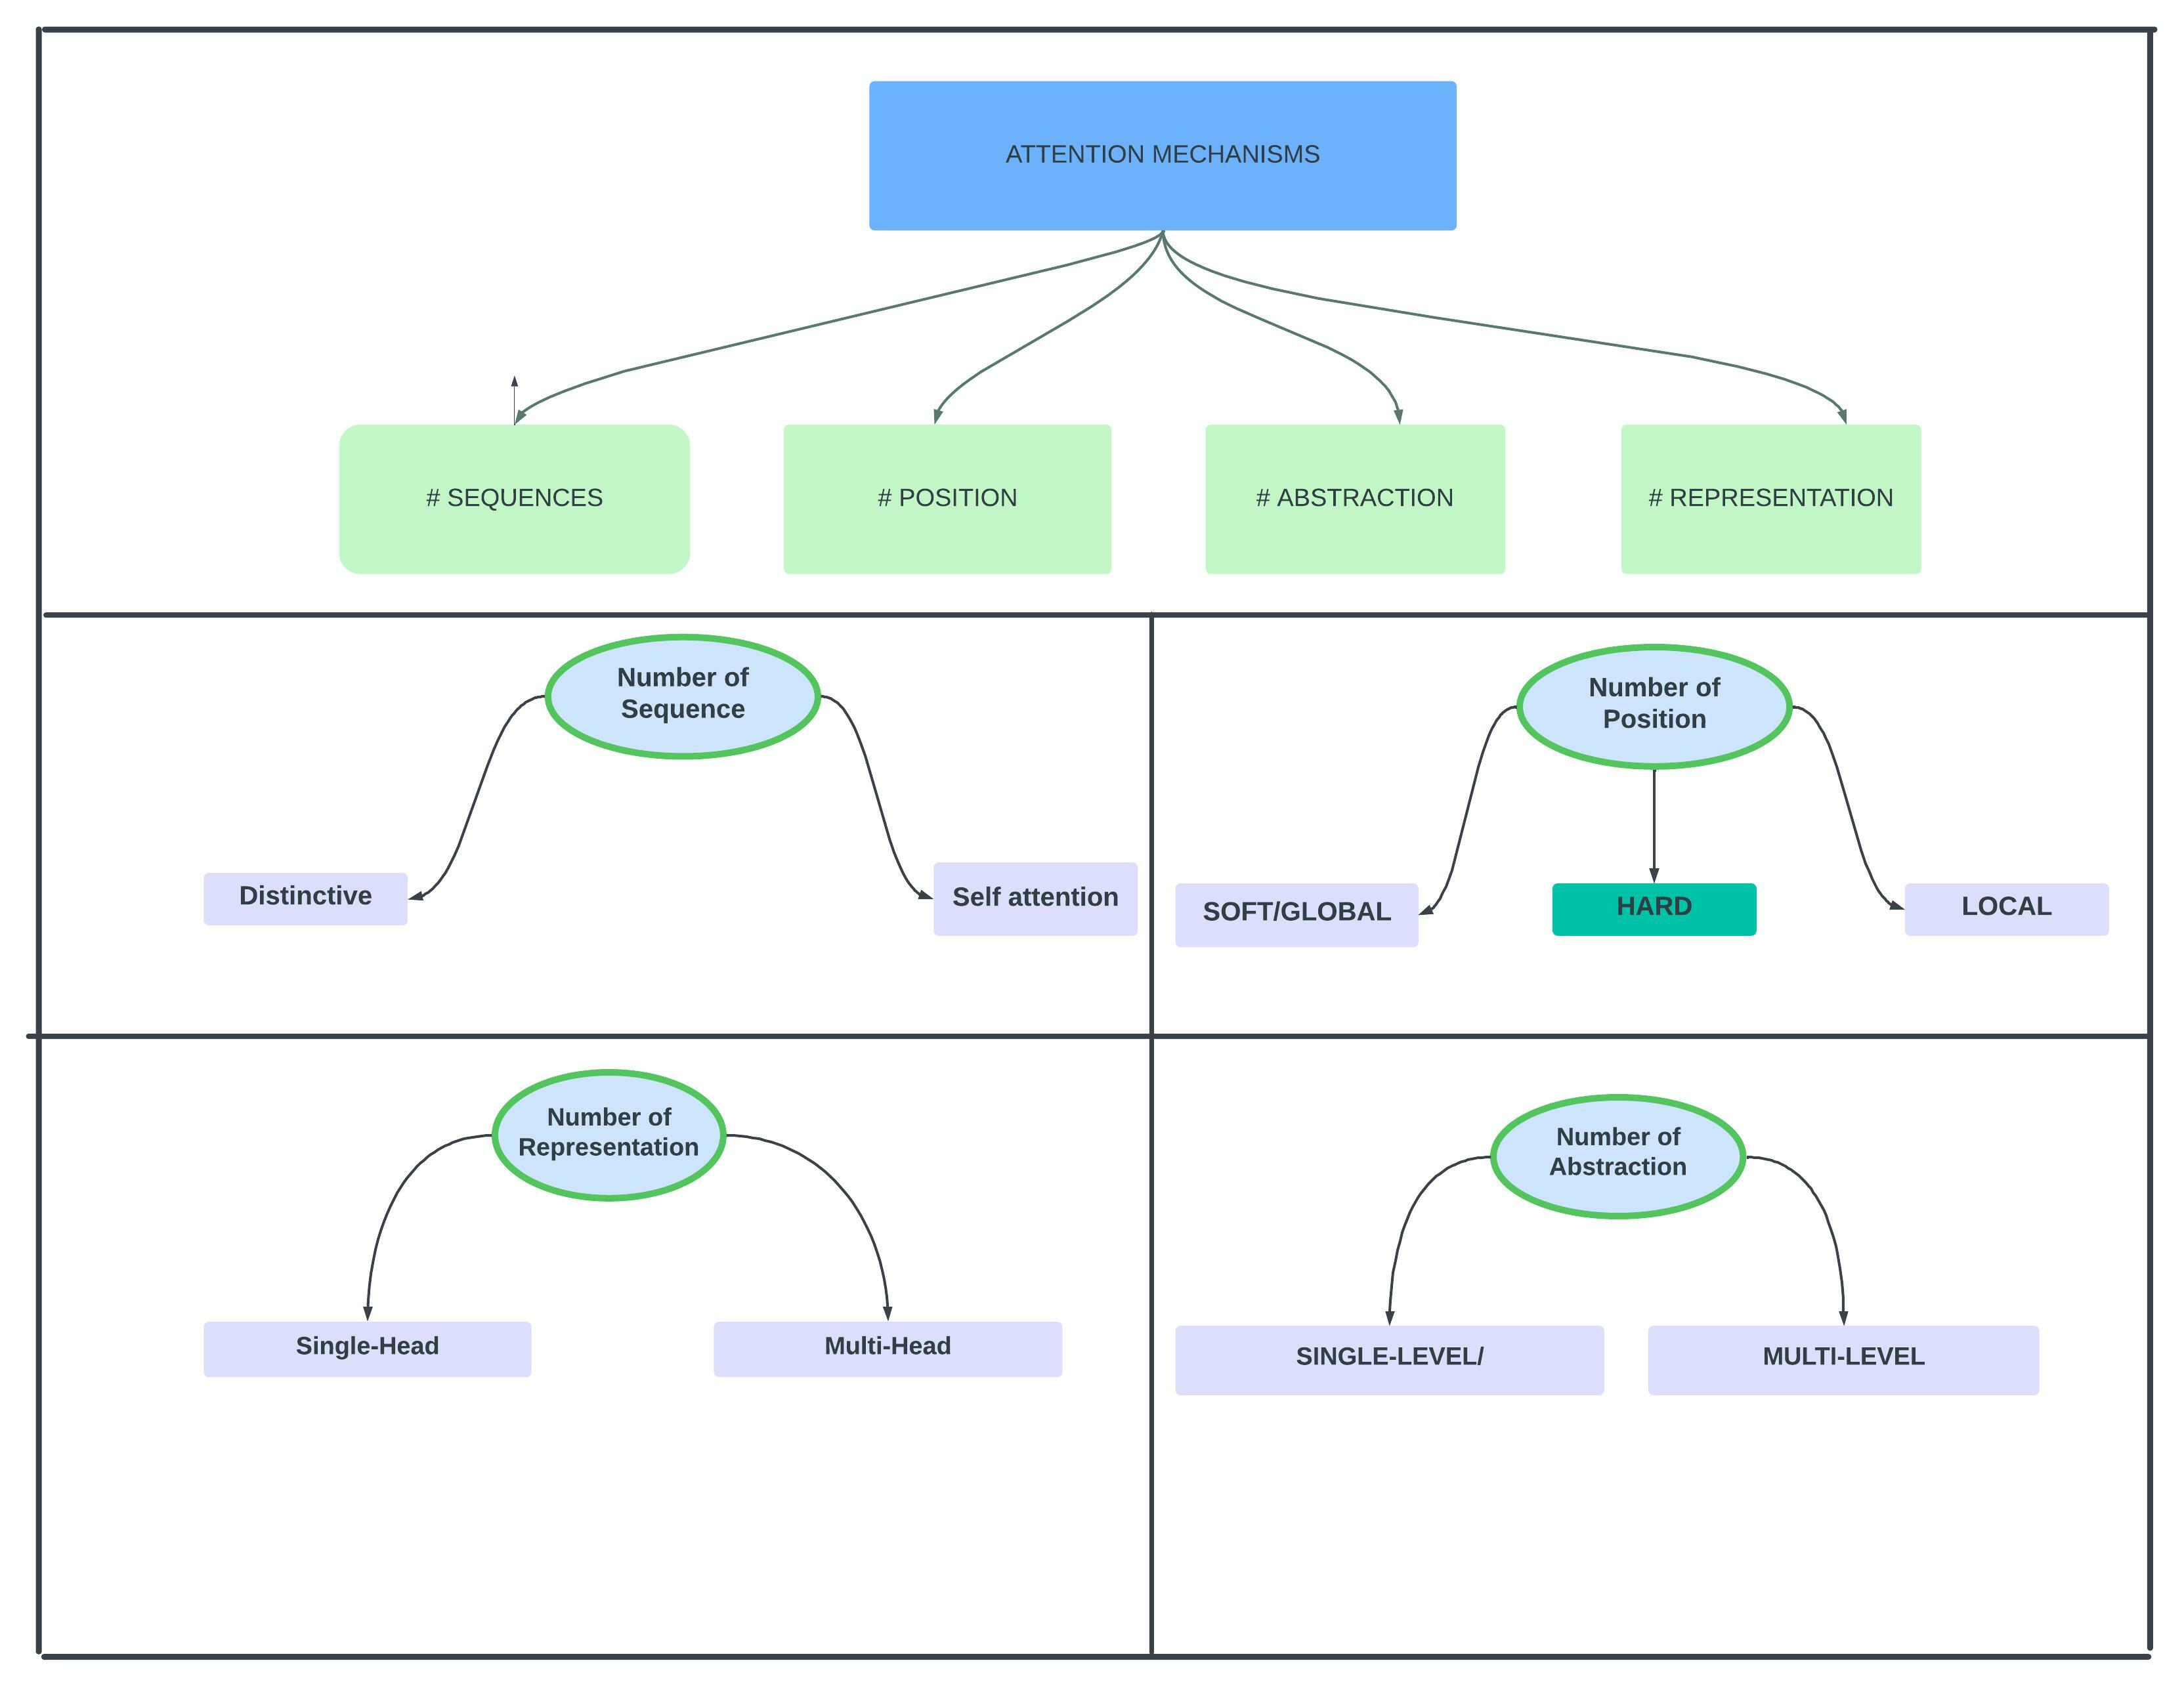

# **What are attention mechanisms based on Number of Sequences?**

### **1. Distinctive Attention Mechanism**s

- In Distinctive Attention Mechanisms, Both key and Query text Sequence is different.
- KEY VECTOR == VALUE VECTOR!= QUERY VECTOR

- ###  **How to Compute Distinctive AM?**
  - Compute KEY, QUERY and VALUE vectors
  - Compute Energy function
  - Compute Attention Score


**Fig Below - Distinctive Attention Mechanisms.**

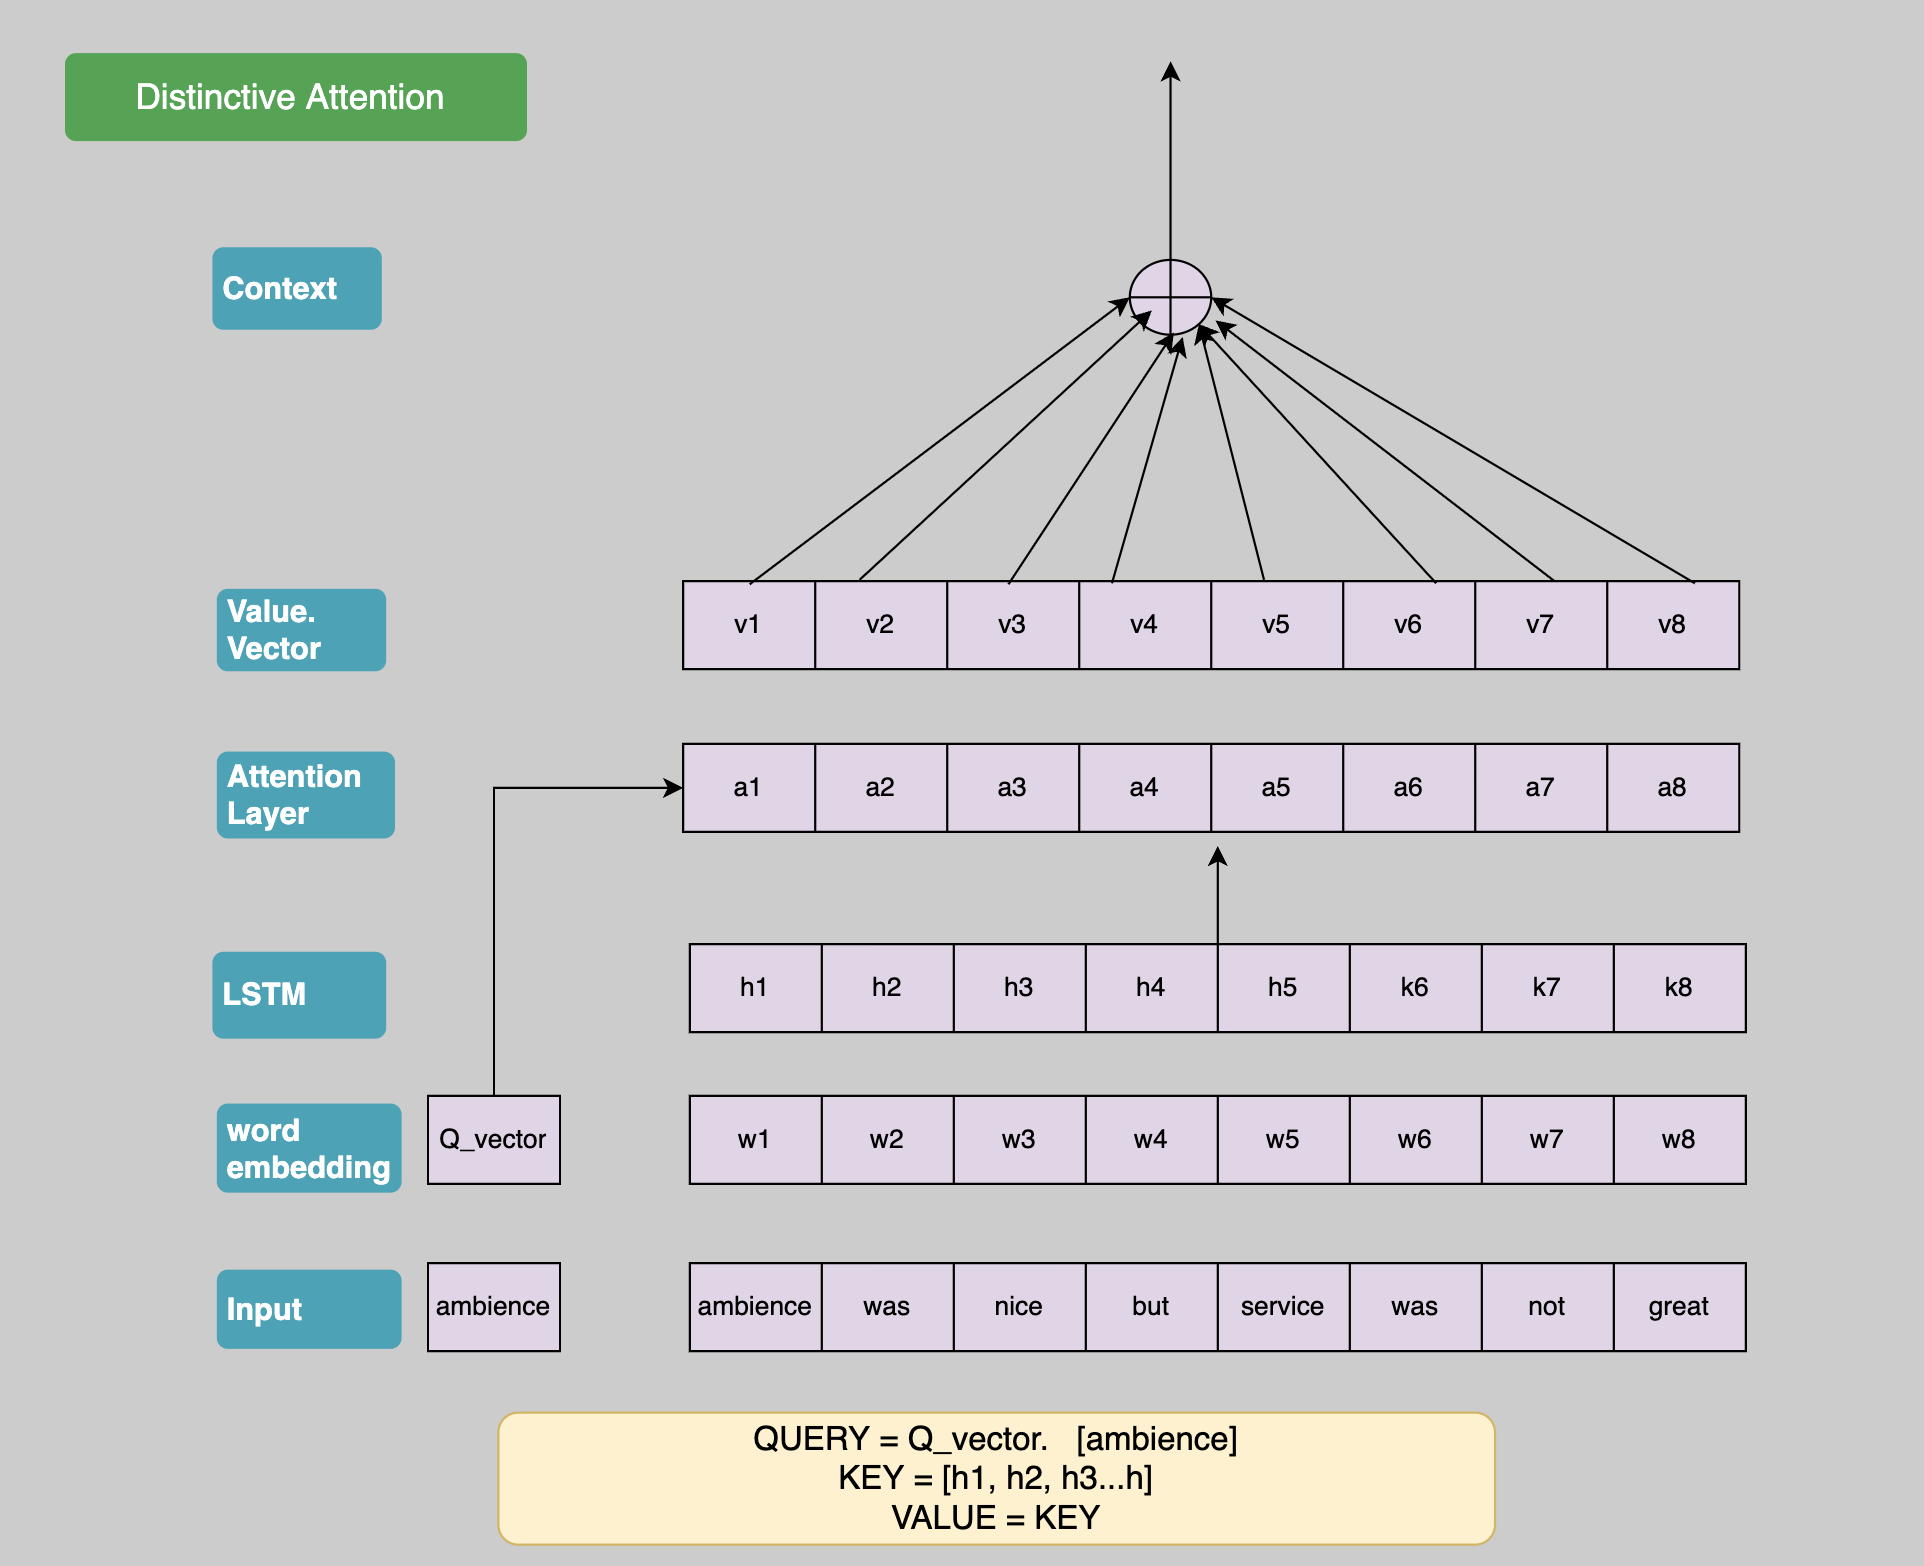


### **2. Self Attention AM**

- In Self-Attention both KEY and QUERY sequence is Same.

- Basically, QUERY = KEY = VALUE

- ###  **How to Compute Self AM?**
  - Compute KEY, QUERY and VALUE Vectors
  - Compute Energy function
  - Compute Attention Score


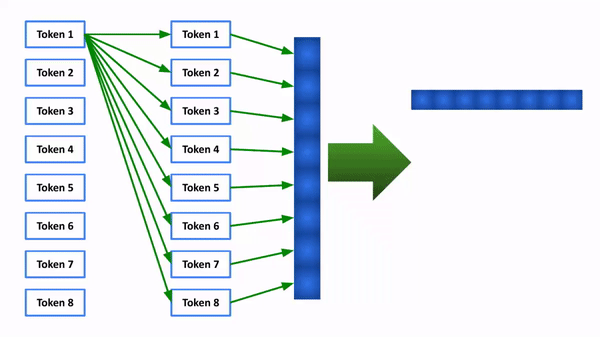

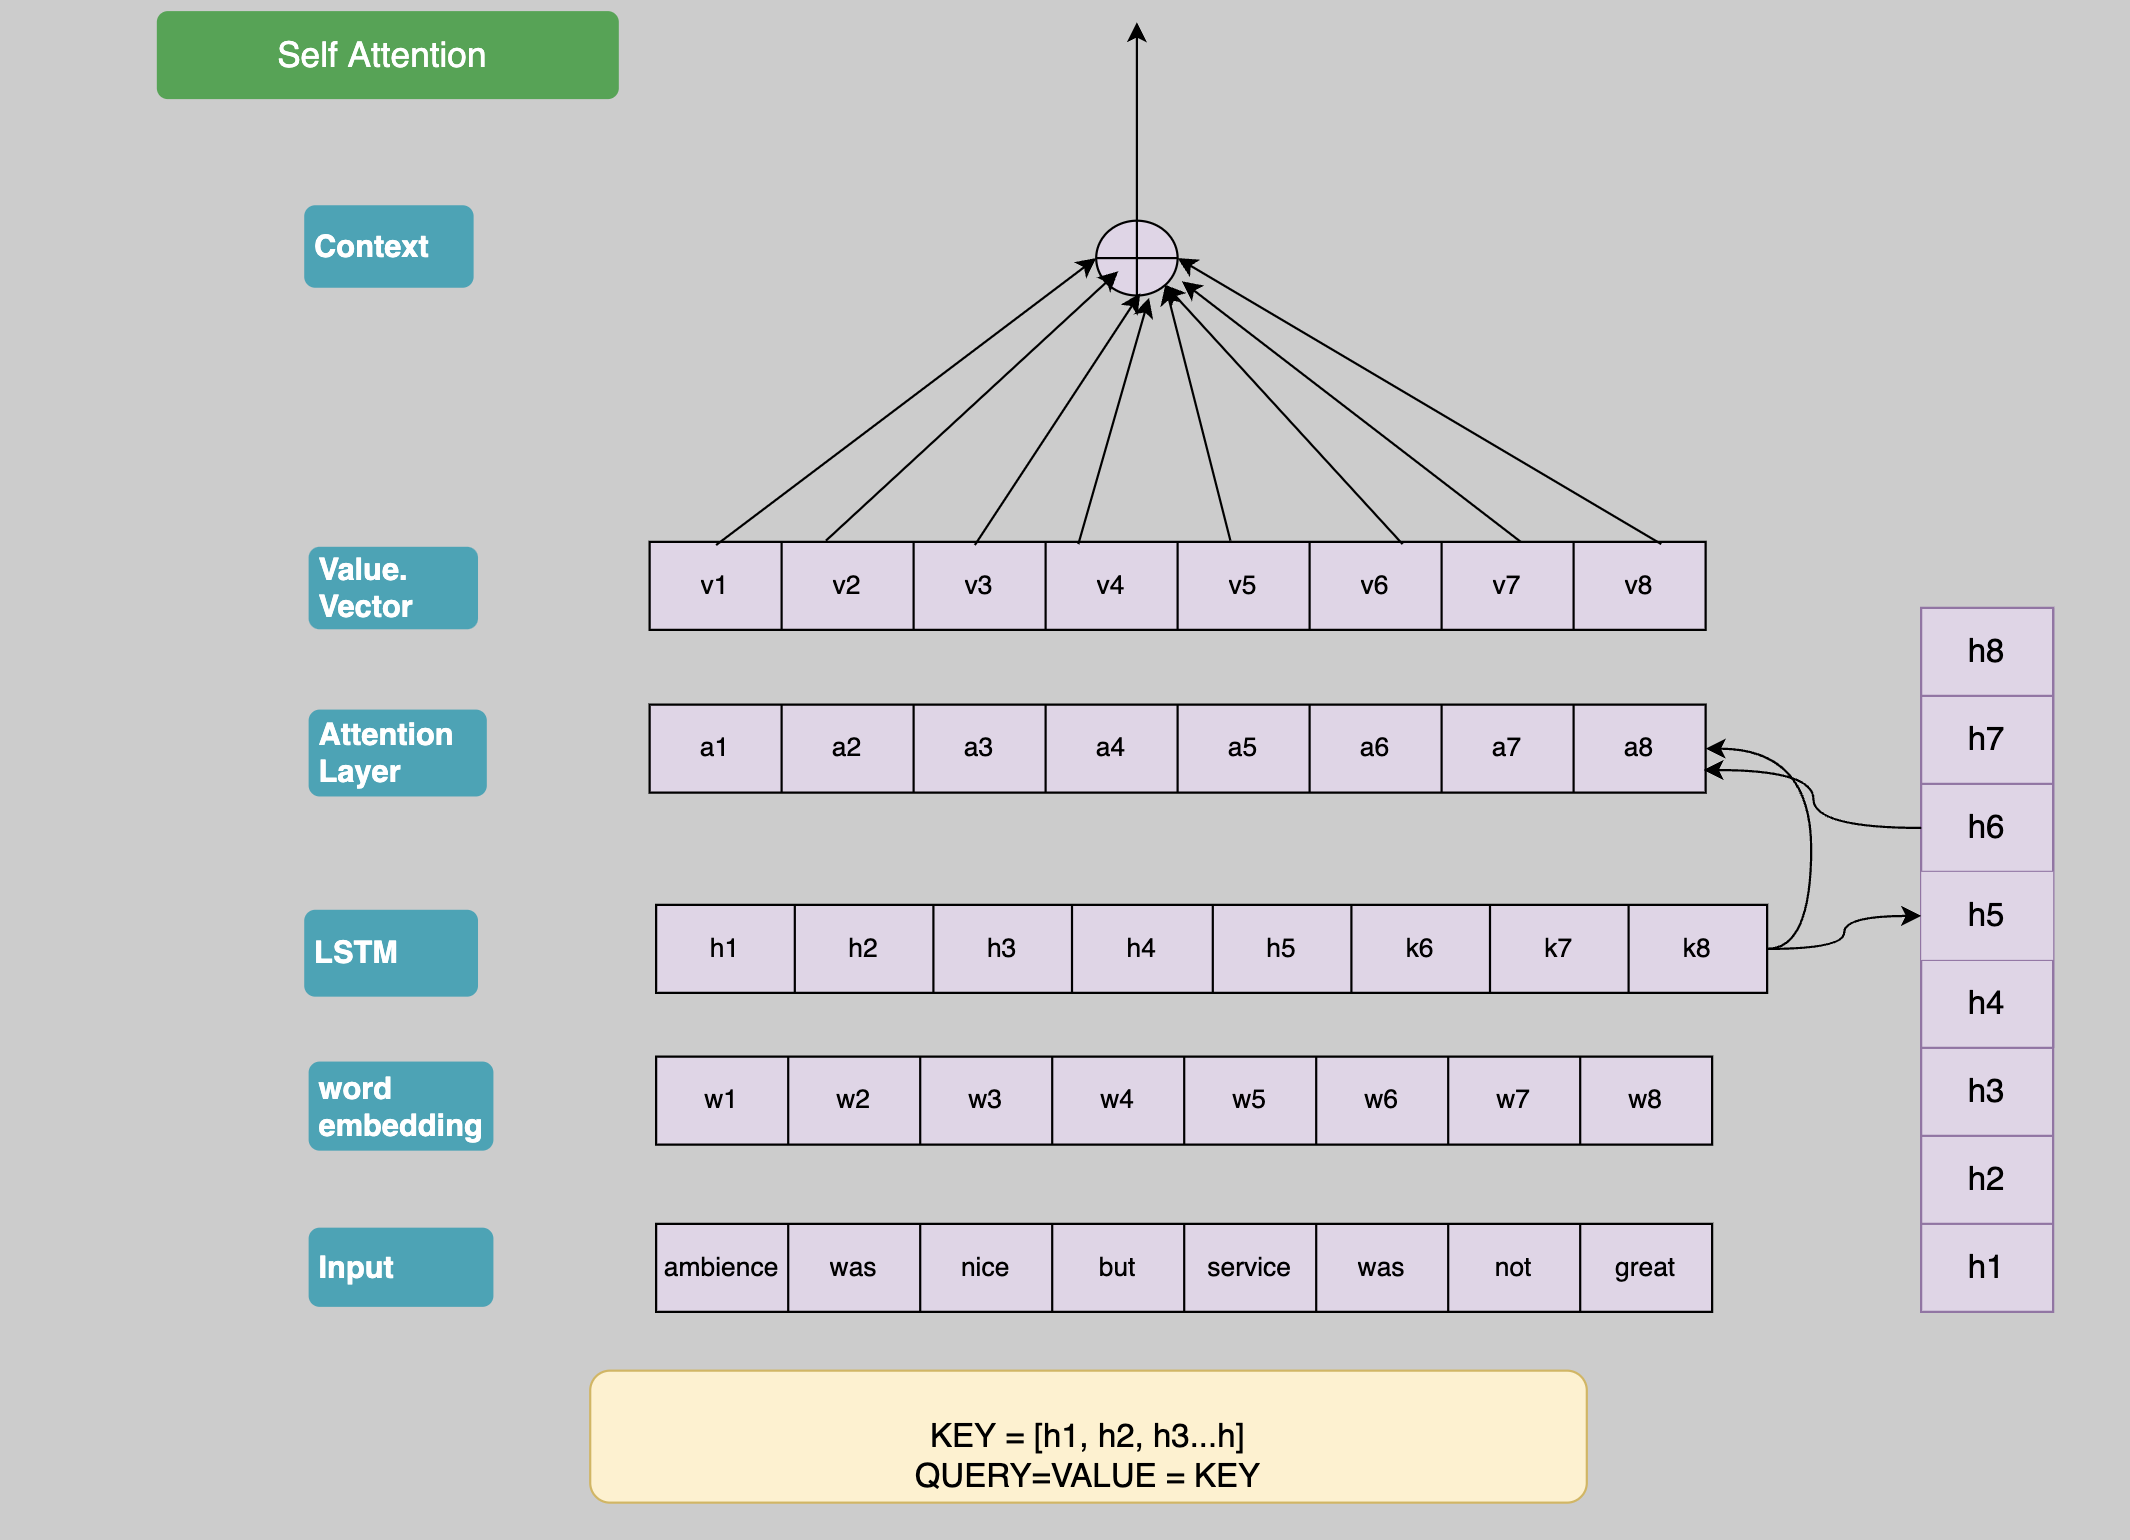

# What are attention mechanisms based on Number of Position?

## **1. Soft Attention Mechanisms**

- In soft attention, we compute attention weight $w_1, w_2, w_3 . . . w_n, \space where \sum W = 1.$ 
- And, It uses a weighted average of all hidden states of the input sequence
to build the context vector. 

 > $z_i =  w_i * v_i, $

  > $C = \sum_{i=1}^{d_k} (z_i), $

- The usage of the soft weighing method makes the neural network
amenable to efficient learning through backpropagation, 


- **Pro**: the model is smooth and differentiable.
- **Con**: expensive when the source input is large.


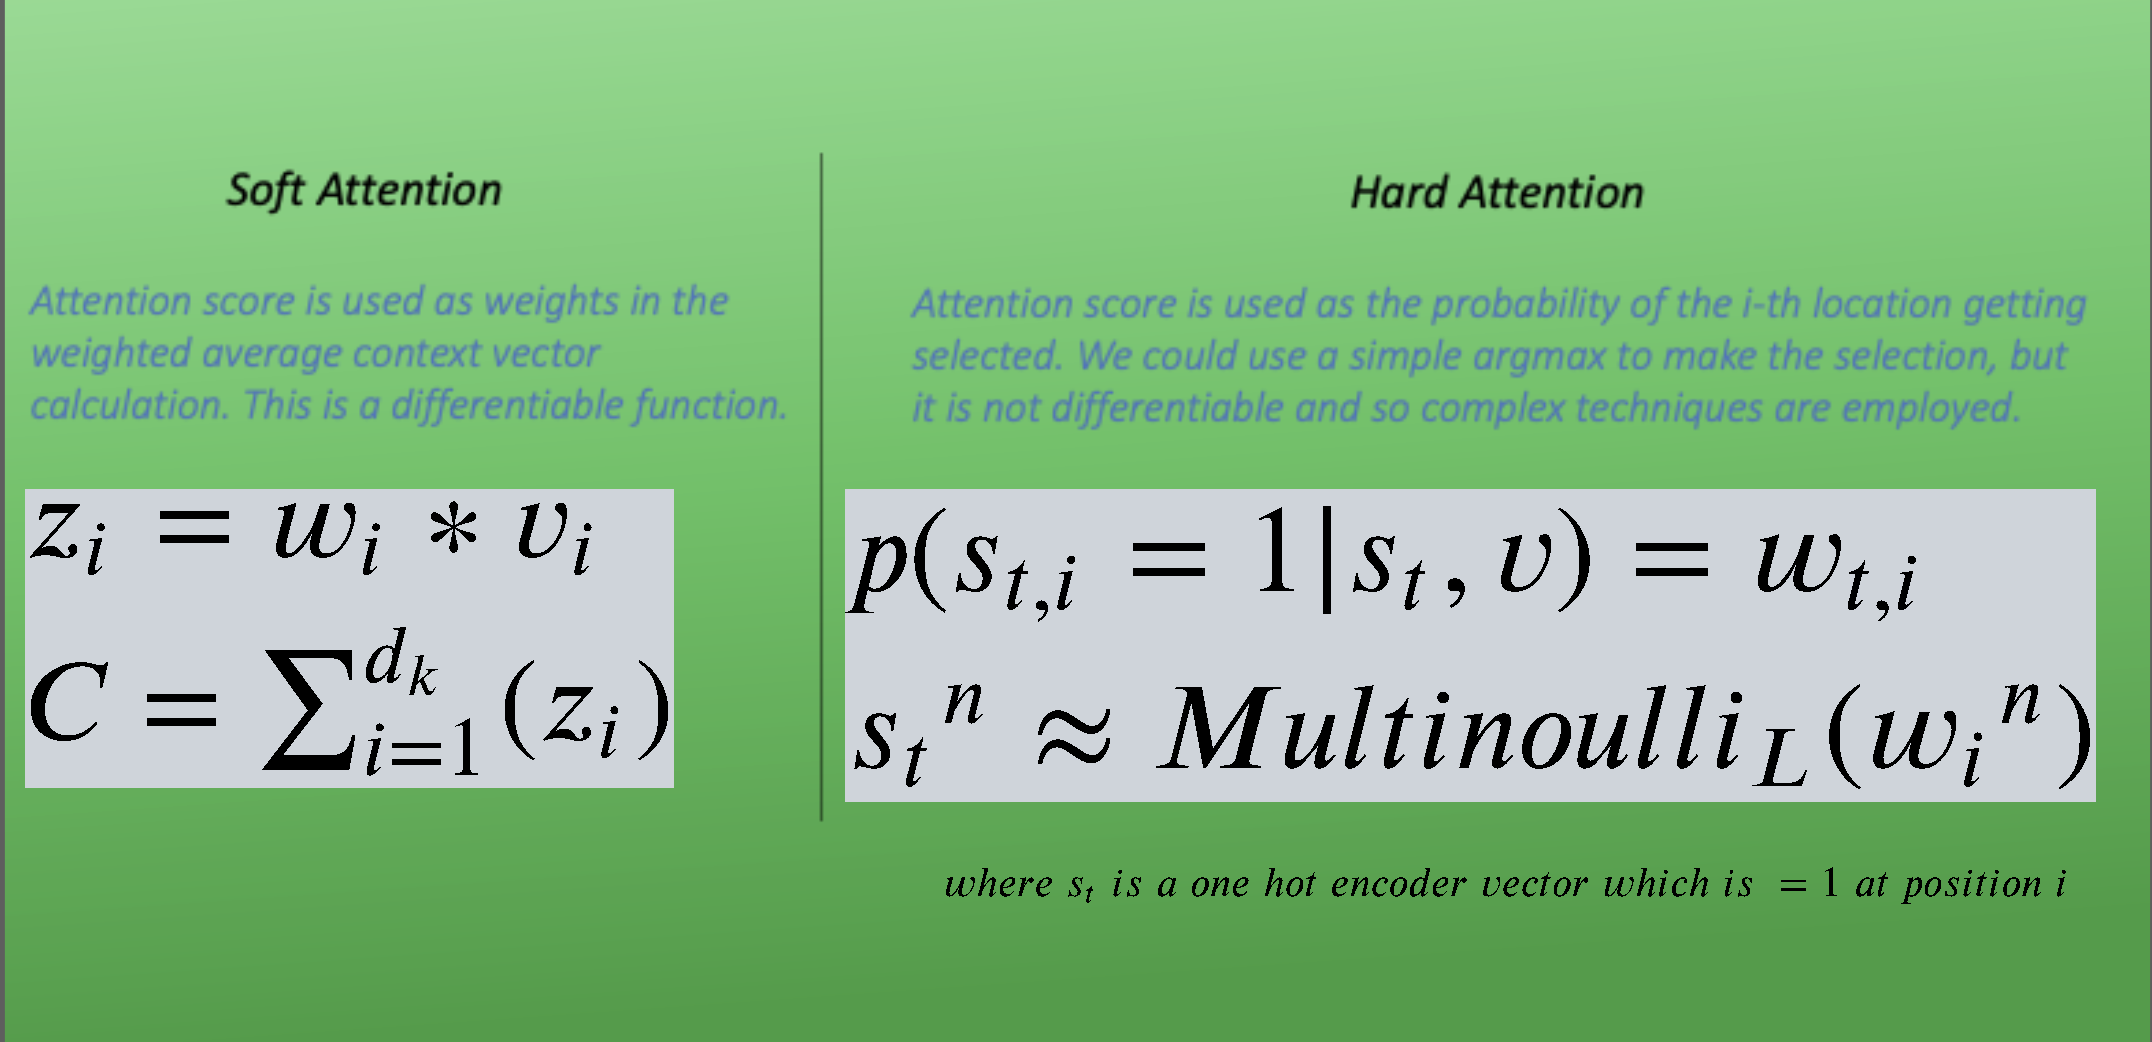

## **2. Hard Attention**

- Calculate attention weights as $w_1, w_2, w_3 . . . w_n$.
- $w_i$  adds up to 1 which can be interpreted as the probability that $v_i$ is the area that we should pay attention to. 
- So instead of a weighted average, hard attention uses $w_i$  as a sample rate to pick one $v_i$.

 $ where, \space \space \normalsize v_i \space ϵ \space Value$
 
-  A value $m ∈ R^1$ is drawn from a multinomial distribution with
$w_1, w_2, w_3 . . . w_n$ as parameters for the probabilities. 
- Then, the
context vector is simply defined as follows:
 > $C = V_m  \space \space \space \space \space where, \space V = VALUE $


- **Pro**: less calculation at the inference time.
- **Con**: the model is non-differentiable and requires more complicated techniques such as variance reduction or reinforcement learning to train

# **What are attention mechanisms based on Number of abstraction?**

## **1. Single-Level Attention**

- In the most general case, attention weights are computed only for the original input sequence. 
- This
type of attention can be termed as single-level.
- **Example** : Above Attention Implementation is a kind of Single-level-attention.

## **2. Multi-level Attention Mechanisms**


- Attention applied on multiple levels of abstraction of the input sequence in a sequential manner. 
- The output (context
vector) of the lower abstraction level becomes the query state for the higher abstraction level.
- **Example** : For the Document Classification,

- Attention applied at two different levels of abstraction, i.e. at word level and sentence level. 
- This model is called a “Hierarchical Attention Model"(HAM) 
- As it captures the natural hierarchical structure of documents, i.e. a document is made up of sentences and sentences
are made up of words. 

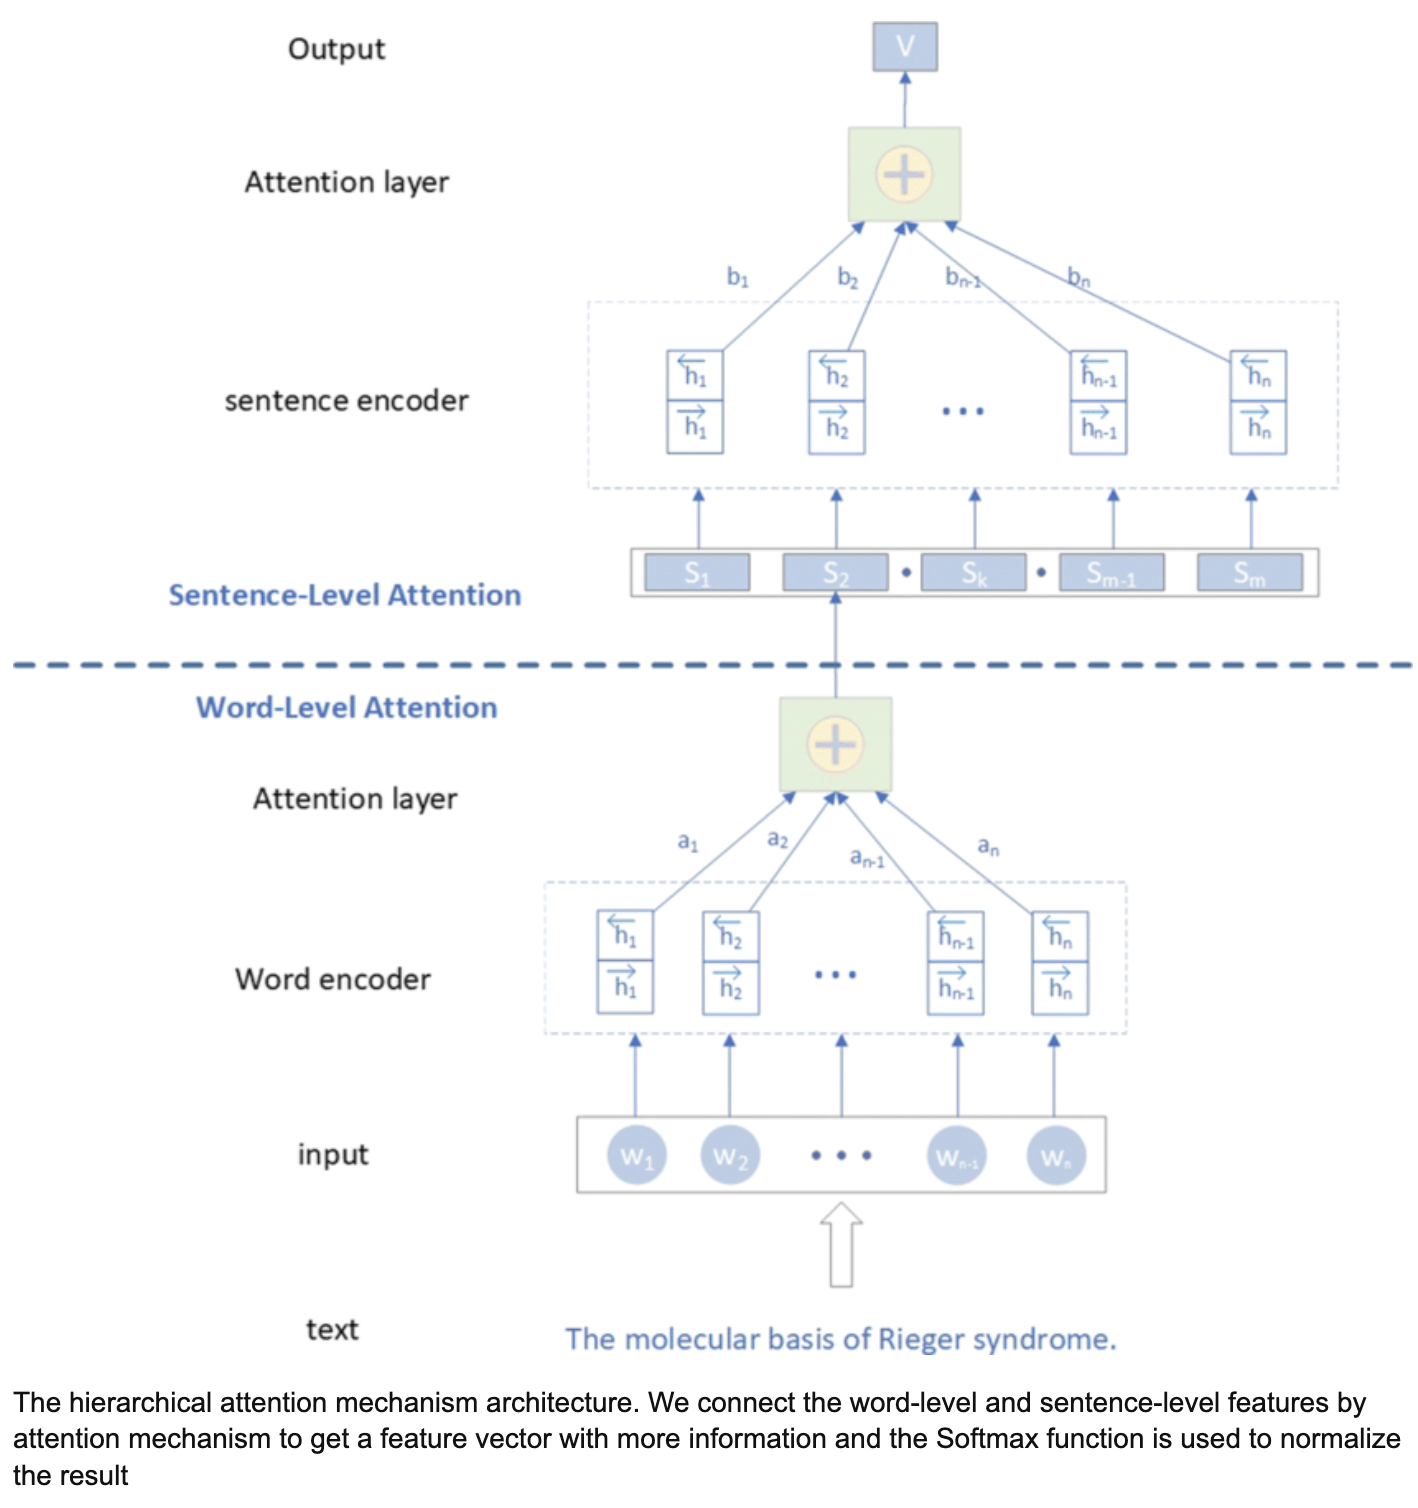

# **What are attention mechanisms based on Number of Representation?**

### **1. Single-Head Attention Mechanisms?**

- In the most general case, attention weights are computed only for the original input sequence. 

- It may or may not contains trainable parameters.
- like if Energy function is DOT product there is no learning parameters involved.
- But if energy function is MLP, there is learning parameters involved.

- This type of attention can be termed as single-headed, etc.
- **Example** : Above Attention Implementation is a kind of Single-level-attention

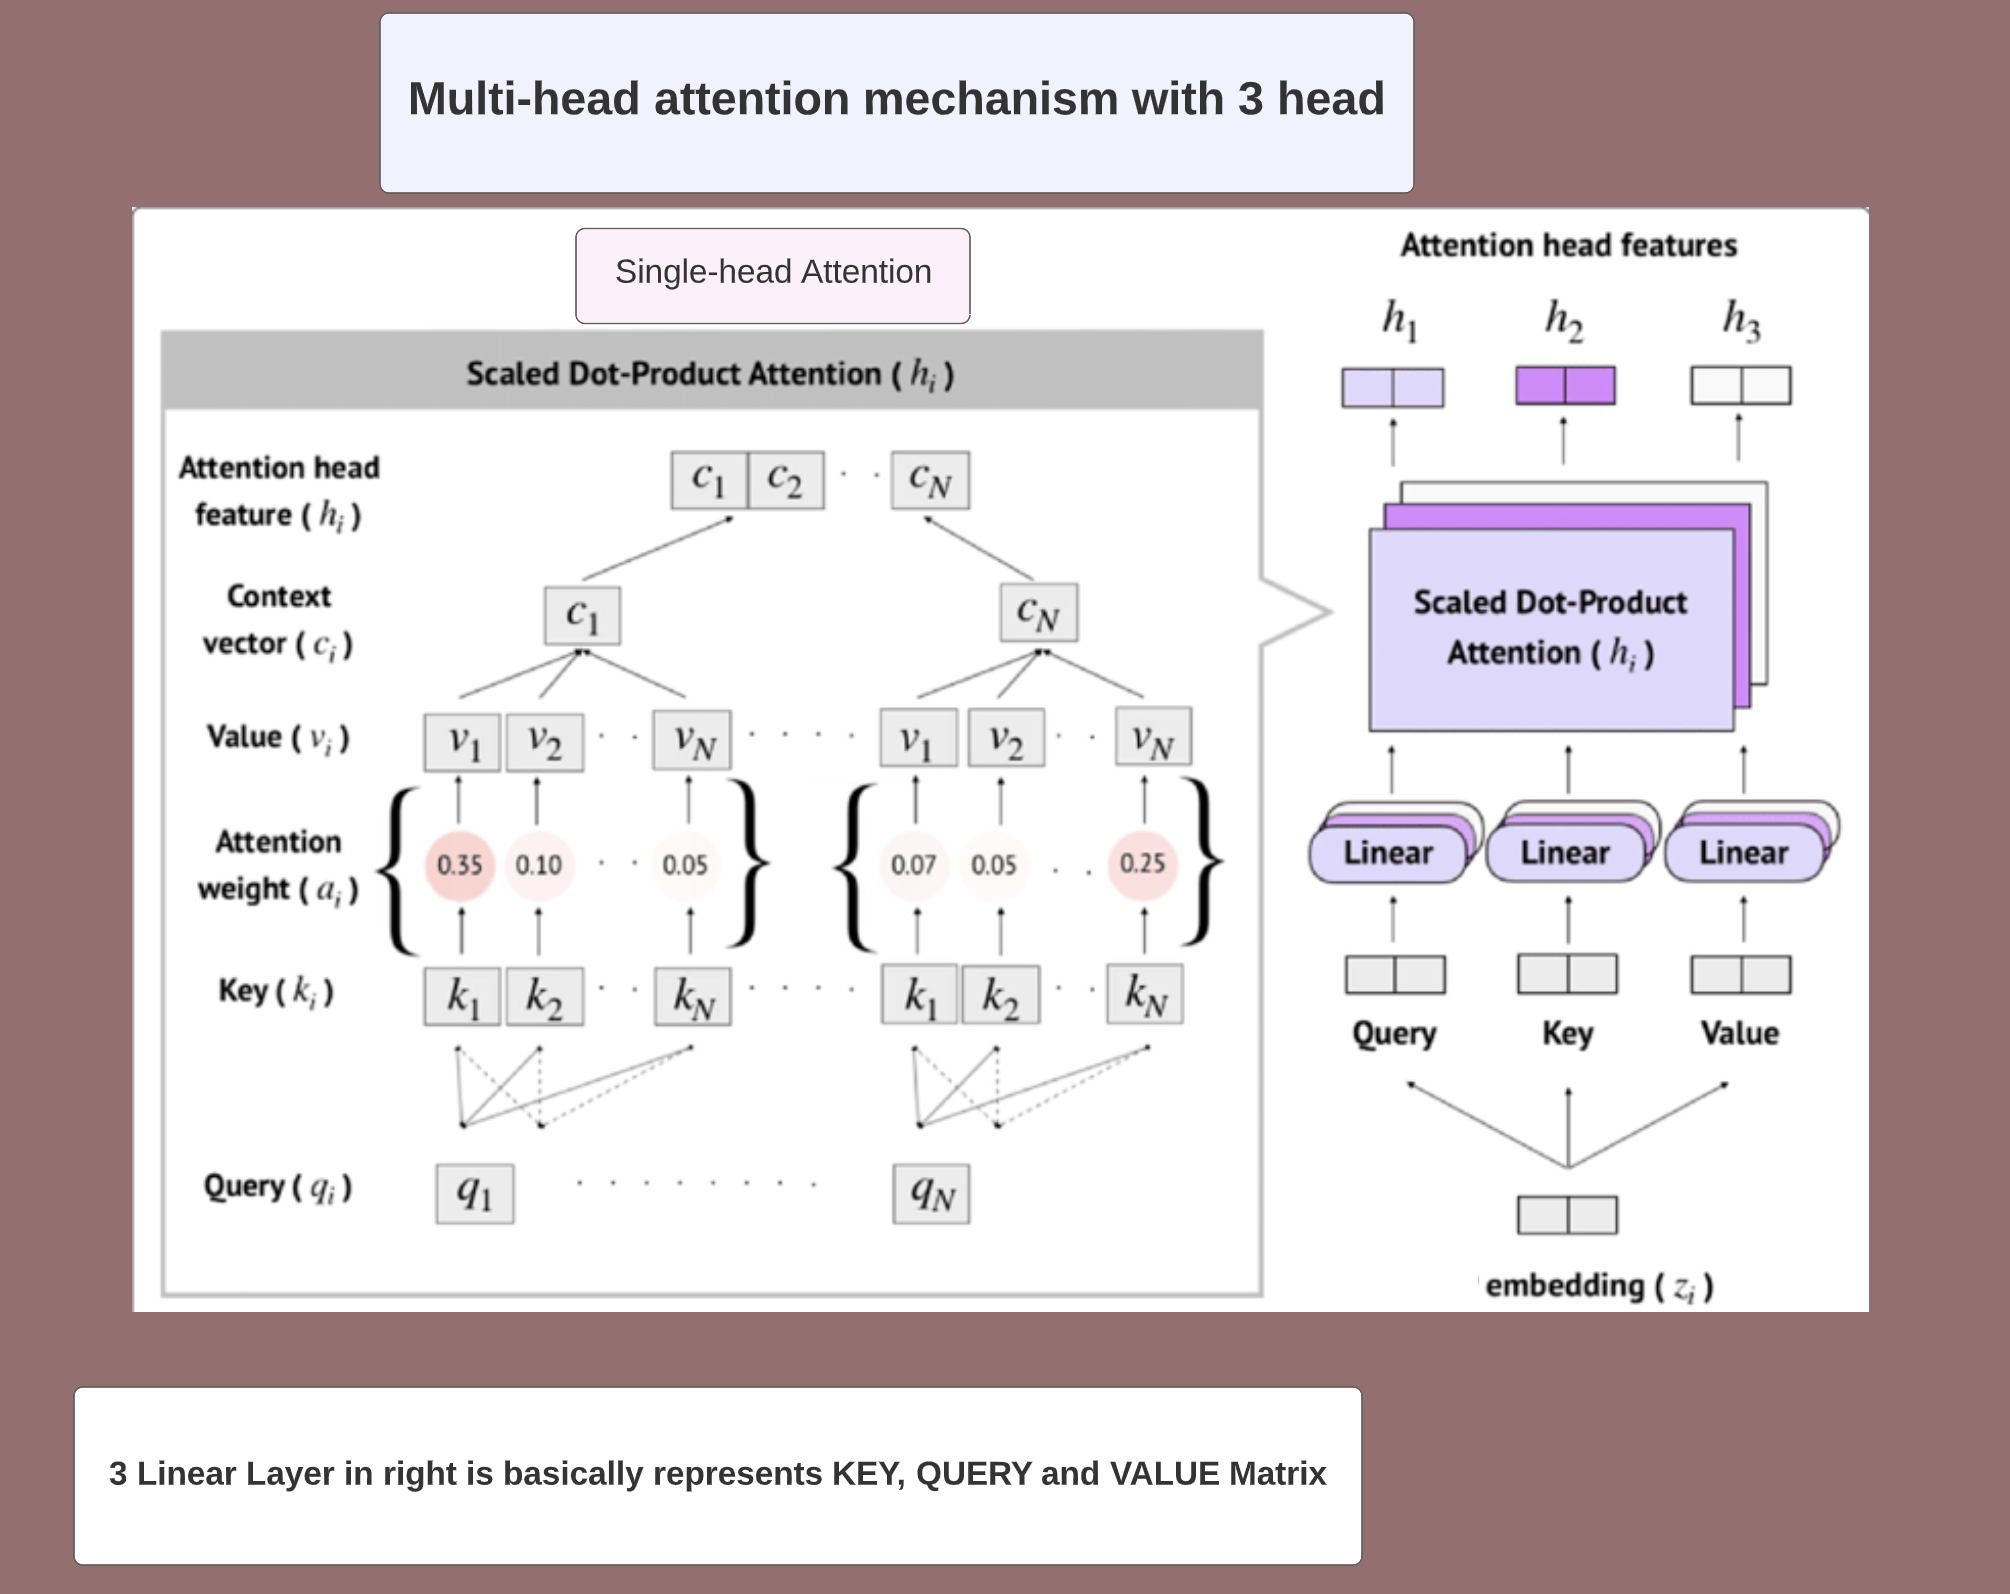

### **2. Multi-headed Attention Mechanisms?**

- Key sequeces can have multiple dependency relation to Query sequences
- i.e. A word in a sequence can have multiple dependency relation to the other word.
- representation of dependency is very much needed to understand syntactic and semantic meaning of sequence.
-Multiple attention heads healps to understand complex relation among the sequence.
- It contains trainable parameters in the from KEY MATRIX, QUERY MATRIX   and VALUE MATRIX.

- **How to Compute Multi-headed AM?**
    1. Randomly intialized wq, wk and wv MATRIX.
    2. Define number of attention head `N`.
    3. Compute Query, Value and Key Matrix by taking Dot product of above three Matrix.
    4. Split each matrix into `N` matrix of shape  (inp_seq_len, depth) each, where depth is nothing but last dimention of above matrix divide by `N`.
    5. For each attention head, Select an energy function and  compute Context vectors
    6. Concat the context vector of all attention head.
    7. pass it through other linear layer.



In [ ]:
from IPython.display import display, HTML
def np_display(x):
  # display dataframe 
  df = pd.DataFrame(x)
  display(df)


def scaled_dot_product_attention(vect, mat):
  # Compute scaled dot product attention mechanisms
  return np.matmul(np.transpose(vect), mat)/(len(vect)**2)

paragraph = [
             'food quality was not good as it was not cooked properly',
             ]


paragraph = [para.split(' ') for para in  paragraph]  

# target== paragraph as we are computing self attention
target = paragraph

# Word embedding of paragraph text
X = [[glove_vectors[i] for i in para] for para in paragraph]
X = np.stack([pca.transform(i) for i in X], axis= 0).reshape(11, 5)


# word embedding of query text
Y = [glove_vectors[i].tolist() for i in target]
Y = np.stack([pca.transform(i) for i in Y]).reshape(11, 5)

# **Lets Compute one of the popular Multi-headed attention in NLP.**

 - ##   `Multi-headed Self Attention`

### **1. Step-1 Randomly intialized wq, wk and wv MATRIX.**
- Each word in X is represented using a vector of size 5.

- Randomly Initialize 3 matrices, `Wq, Wv, Wk = [5   ✕  9]` matrix
 
      

In [ ]:
wk = np.ones((5, 9))
wv = np.ones((5, 9))
wq = np.ones( (5, 9))
display(HTML('<h3>WQ</h3>'))
np_display(wq)


0    1    2    3    4    5    6    7    8
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

### **2. Define number of Attention Head**

- For our task assumes N=3

In [ ]:
N_head = 3

## **3. Compute Query, Value and Key Matrix**

- Three new matrix can be generated by dot product on  each weight matrices with seq_embedding,



$Query \space Matrix = Q =  X • W_q $         
$Key \space Matrix = K     = X • W_k $        
$Value \space Matrix  = V = X • W_v $  

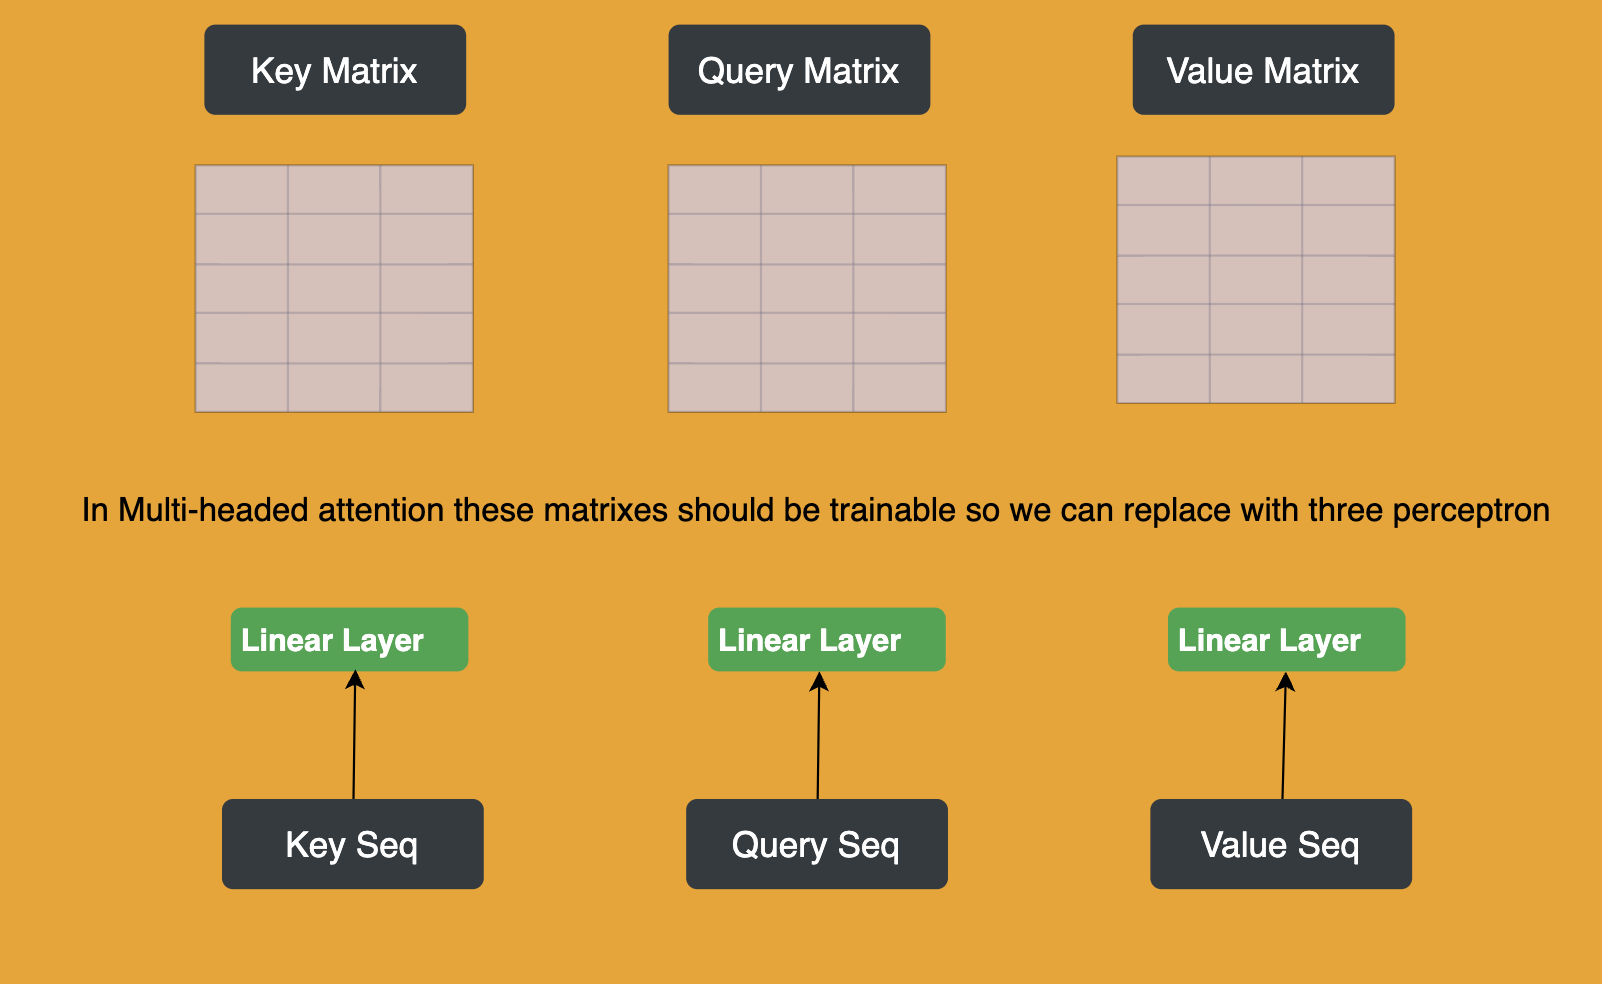

## **4. Split the Matrix**

- Split the matrix into `N` sub-matrix

In [ ]:
KEY_VECTORS = np.matmul(X, wk)
QUERY_VECTORS = np.matmul(X, wq)
VALUE_VECTORS = np.matmul(X, wv)



KEY_MATRIX = np.hsplit(KEY_VECTORS, N_head)
QUERY_MATRIX = np.hsplit(QUERY_VECTORS, N_head)
VALUE_MATRIX = np.hsplit(VALUE_VECTORS, N_head)


display(HTML('<h3>KEY_MATRIX</h3>'))
np_display(KEY_MATRIX[0])


0         1         2
0   0.634224  0.634224  0.634224
1   2.289757  2.289757  2.289757
2  -3.876674 -3.876674 -3.876674
3  -0.601530 -0.601530 -0.601530
4   0.769227  0.769227  0.769227
5   2.868251  2.868251  2.868251
6  -1.117698 -1.117698 -1.117698
7  -3.876674 -3.876674 -3.876674
8  -0.601530 -0.601530 -0.601530
9   1.068373  1.068373  1.068373
10  1.565386  1.565386  1.565386

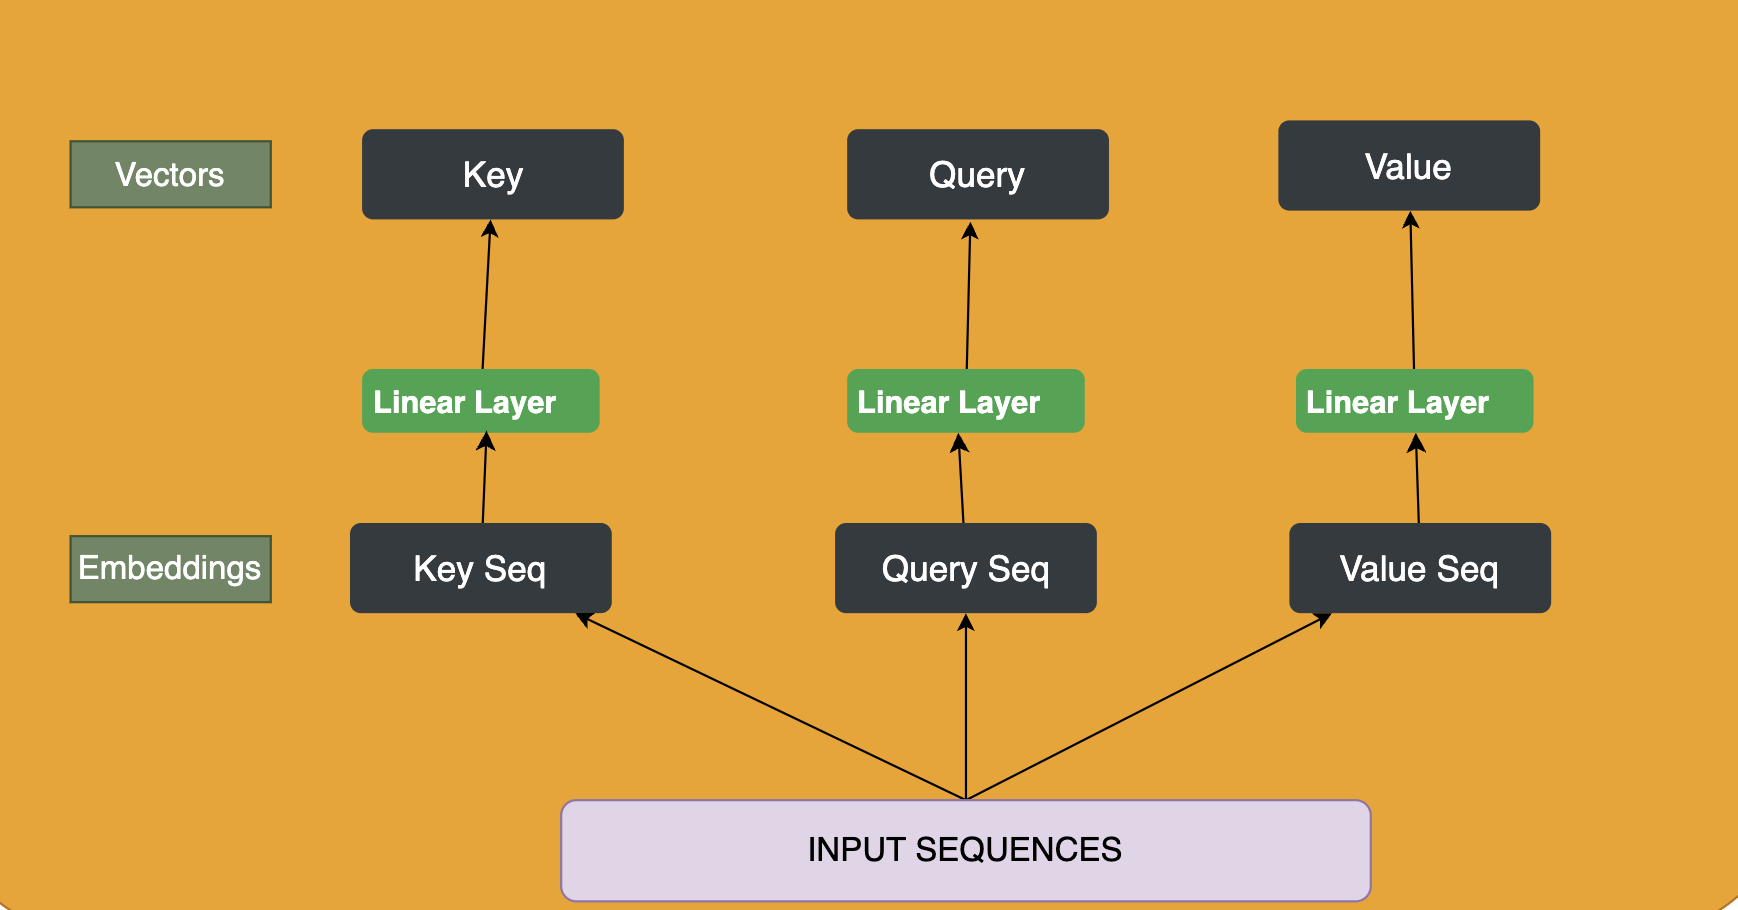

## **5. Select an energy function and Compute Attention Scores.**

- Lets choose an energy function -> `Scaled Dot Product`.
- Using Query, Key and Value Matrix, compute context vector.


  - $ a(Q,K) =  \dfrac{Q.K^T}{\sqrt D}$

  where $Q$ = `QUERY_VECTORS`\
      $K$ = `KEY_VECTORS`\
      $D$ = `Dimension of Input word representation`.

In [ ]:
dot_product = np.matmul(KEY_MATRIX[0].T, QUERY_MATRIX[0])
attention_values = dot_product/(5)**0.5
np_display(attention_values)

0          1          2
0  22.399045  22.399045  22.399045
1  22.399045  22.399045  22.399045
2  22.399045  22.399045  22.399045

## **6. Calculate Context Vextor**

- Normalize the weight using `softmax`.
- Return DOT Product of attention score and Value Vector

$In \space below \space Diagram, Q= Query,$\
$K= Key, $\
$V=Value,$\
$ where \space  \space K==Q==V \space $ 

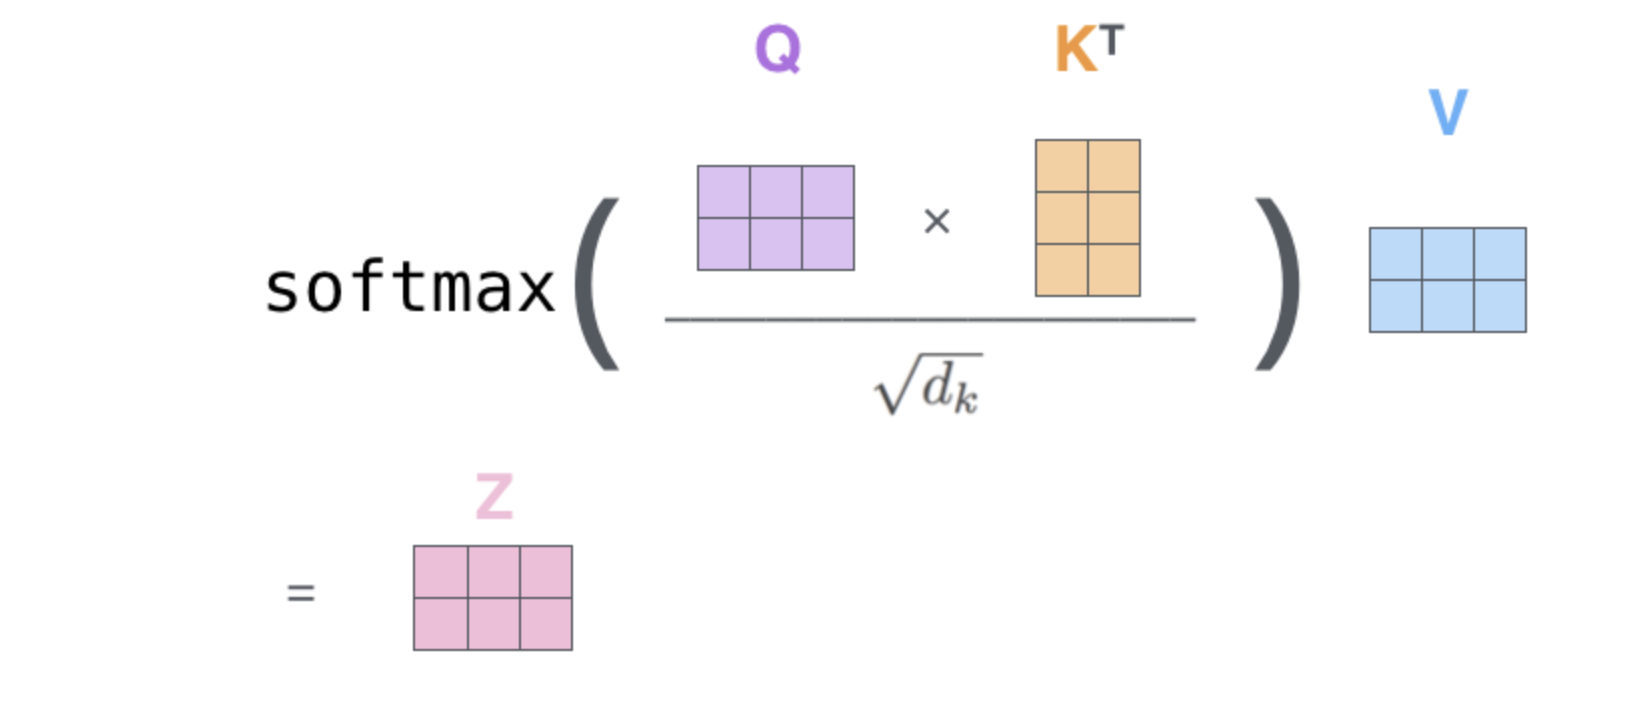

In [ ]:
#softmaxing
attention_value = np.array(attention_values, dtype=np.float64)
e_x = np.exp(attention_value)
attention_score =  e_x / e_x.sum(axis=0)

#concate context vector
context_vector = np.matmul(VALUE_MATRIX[0], attention_score.T)
display(pd.DataFrame(context_vector))

0         1         2
0   0.634224  0.634224  0.634224
1   2.289757  2.289757  2.289757
2  -3.876674 -3.876674 -3.876674
3  -0.601530 -0.601530 -0.601530
4   0.769227  0.769227  0.769227
5   2.868251  2.868251  2.868251
6  -1.117698 -1.117698 -1.117698
7  -3.876674 -3.876674 -3.876674
8  -0.601530 -0.601530 -0.601530
9   1.068373  1.068373  1.068373
10  1.565386  1.565386  1.565386

## **7. Compute Multi-headed Context Vector For N_Head**

- $Z = concat(context\_vector1, context\_vector2, context\_vector3)$
- where , $context\_vector1 = z_0, context\_vector2 = z_1, context\_vector3=z_3$


## **Multi-headed computation Flow**

In [ ]:
z = []

#step-1
KEY_MATRIX = np.ones((5, 9))
VALUE_MATRIX = np.ones((5, 9))
QUERY_MATRIX = np.ones( (5, 9))

#step-2
N_head = 3

#step-3
KEY_VECTORS = np.matmul(X, wk)
QUERY_VECTORS = np.matmul(X, wq)
VALUE_VECTORS = np.matmul(X, wv)


# step-4
KEY_MATRIX = np.hsplit(KEY_VECTORS, N_head)
QUERY_MATRIX = np.hsplit(QUERY_VECTORS, N_head)
VALUE_MATRIX = np.hsplit(VALUE_VECTORS, N_head)


# Compute context vector for N-head
for i in range(N_head):

  #step-5
  dot_product = np.matmul(KEY_MATRIX[i].T, QUERY_MATRIX[i])
  attention_values = dot_product/(5)**0.5
  
  
  attention_values = np.array(attention_values, dtype=np.float64)
  e_x = np.exp(attention_values)
  attention_score =  e_x / e_x.sum(axis=0)
  
  #step-6
  context_vector = np.matmul(VALUE_MATRIX[i] , attention_score.T )
  z.append(context_vector)

# step-7
context_vectors = np.hstack(z)

## **ViSUALIZATION OF MULTIHEAD ATTENTION COMPUTATION**

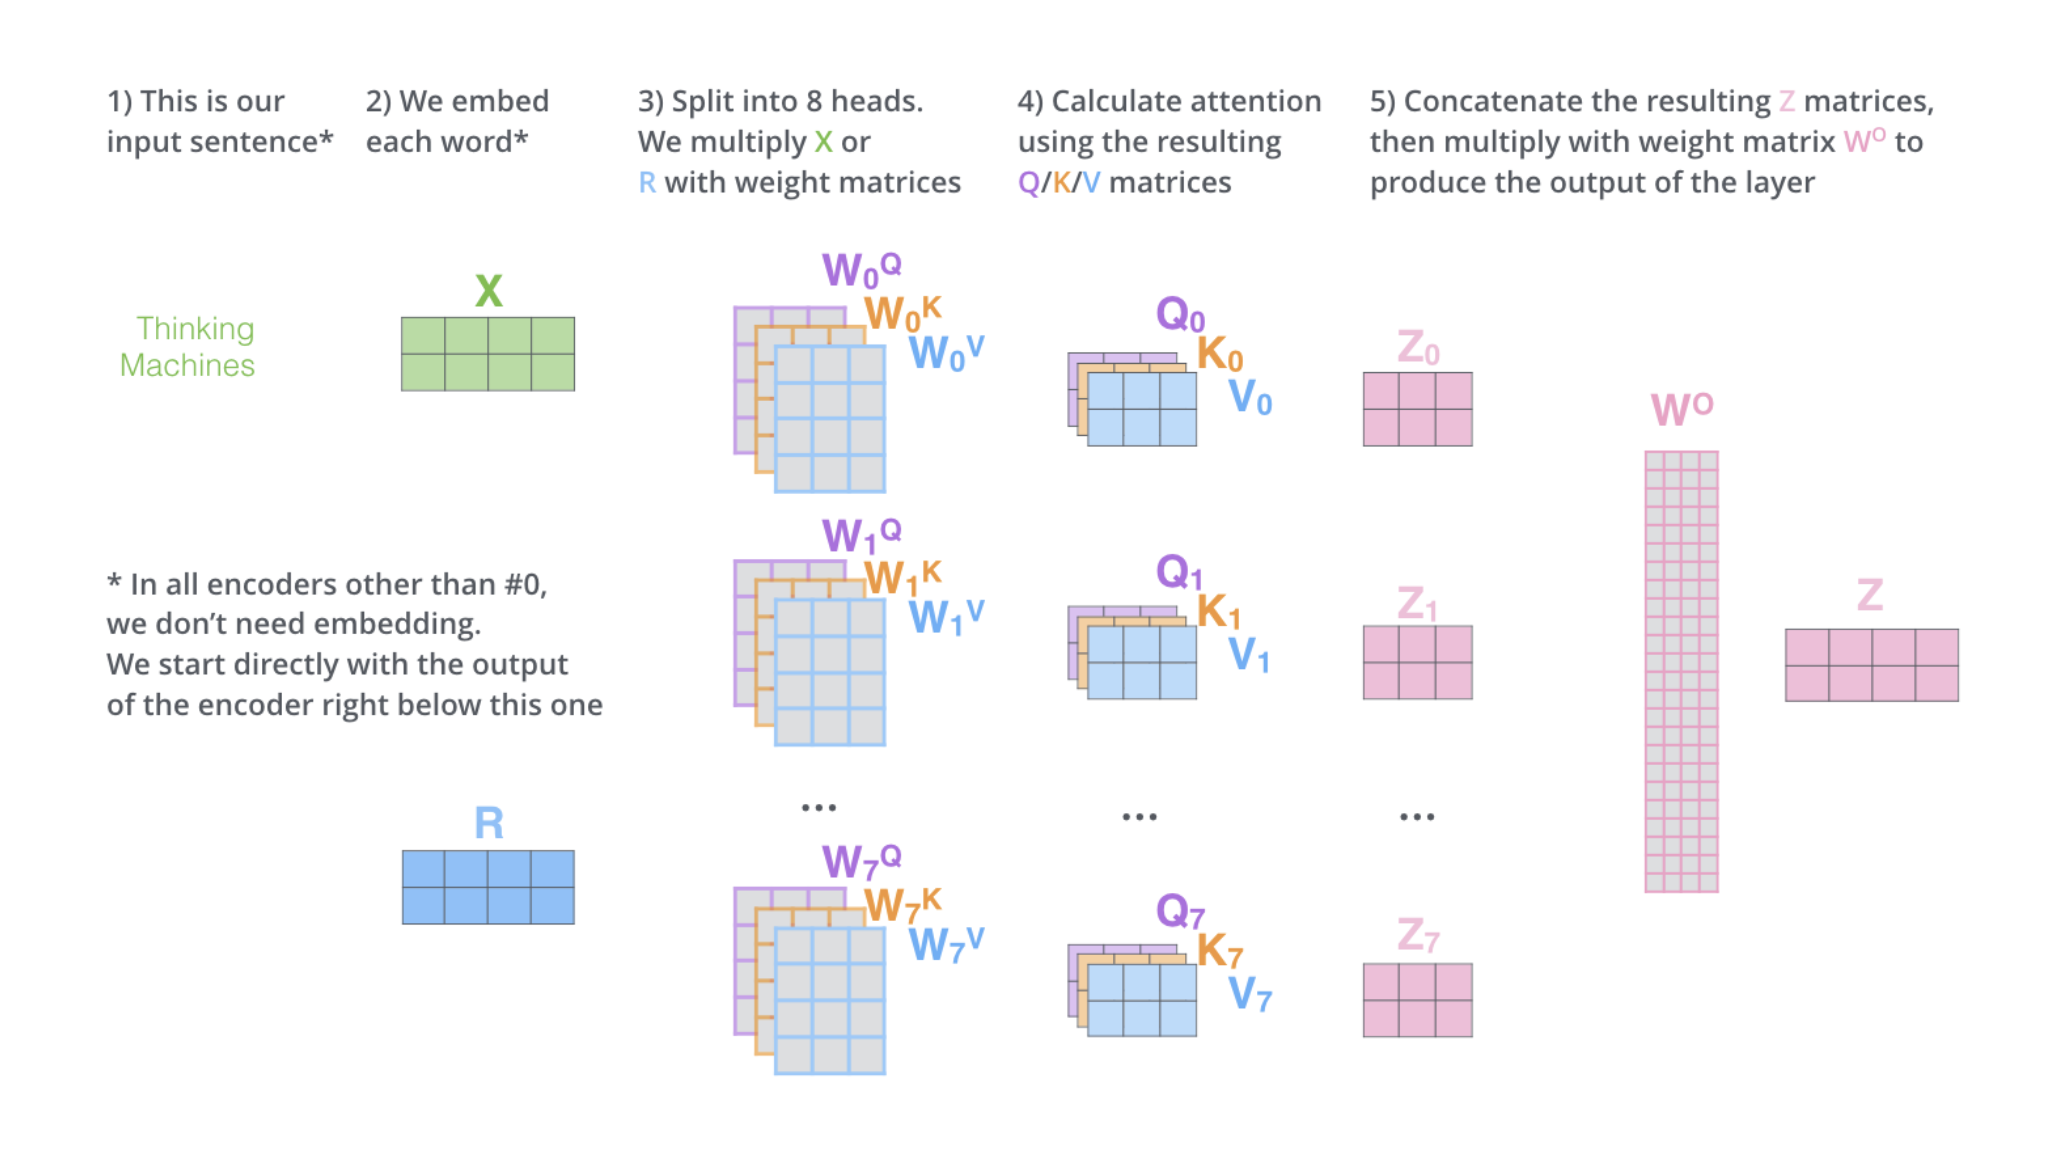

# **Why it is popular and what is its significance?**
In a single self-attention operation, all this information just gets summed together.


*  Multi-head attention helps to learn diverse syntactic relations in a given input sequence. 
*   provides greater power of discrimination, by combining several self attention mechanisms each with different matrices $W_{iq}, W_{iv}, W_{ik}$



## **Below showing attention heatmap of "it" word at different attention head.**



- for simplicity, assume we have two attention head,
- Two attention head shown in below diagram as green and brown heatmap.
- 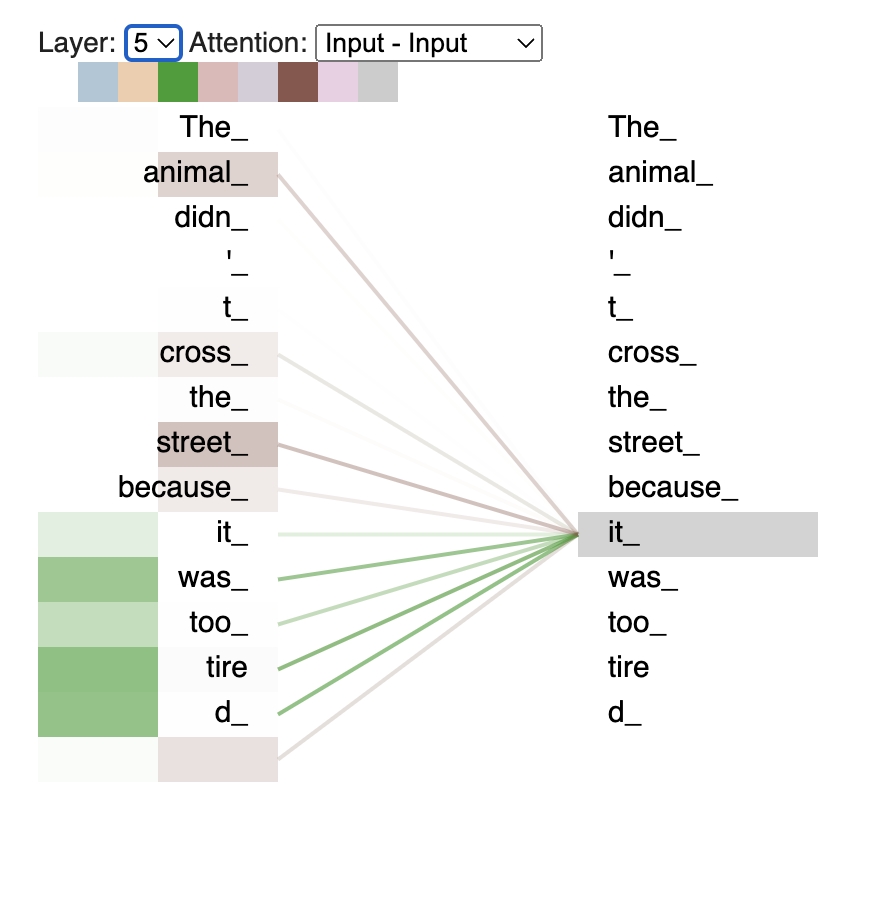


You Can See, one attention head is focusing on the "animal" portion,
while other attention head is fousing on "tired" portion of sentence.

So basically different attention head learns different relation among the words.






# **Code Implementation**

In [ ]:
import xml.etree.ElementTree as ET
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
import gensim.downloader as api
from tensorflow.keras.layers import Embedding

tf.random.set_seed(123)

## **DOWNLOAD THE DATASET**

In [ ]:
# Downloasd dataset

!gdown 1r8SeRlZgWXd5UDuWBUMZ4_4A9bb_6SjY
!gdown 1UmEt8uQuTF6aa2nwTywqFOLRPHp6kkVv
!gdown 1uw1xQ-ryaWtZeDRzvCAIlKJlGFadUdyL
!gdown 1Zg7-x5iHtFelx_sKQJfsgrU_YHtKXXCr
!gdown 1TJDZsa5IOqxuQryhhFQovN72i-1rBLPZ
!gdown 1uXQSKet_KYkQVYyTWmjnYqFebadRtikn

Downloading...
From: https://drive.google.com/uc?id=1r8SeRlZgWXd5UDuWBUMZ4_4A9bb_6SjY
To: /content/ABSA16_Restaurants_Train_SB1_v2.xml
100% 723k/723k [00:00<00:00, 102MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UmEt8uQuTF6aa2nwTywqFOLRPHp6kkVv
To: /content/EN_LAPT_SB1_TEST_.xml.gold
100% 272k/272k [00:00<00:00, 80.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uw1xQ-ryaWtZeDRzvCAIlKJlGFadUdyL
To: /content/EN_REST_SB1_TEST.xml.gold
100% 266k/266k [00:00<00:00, 51.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Zg7-x5iHtFelx_sKQJfsgrU_YHtKXXCr
To: /content/Laptop_Train_v2.xml
100% 687k/687k [00:00<00:00, 126MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TJDZsa5IOqxuQryhhFQovN72i-1rBLPZ
To: /content/restaurants-train.json
100% 927k/927k [00:00<00:00, 131MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uXQSKet_KYkQVYyTWmjnYqFebadRtikn
To: /content/restaurants-train.xml
100% 1.11M/1.11M [00:00<00:00, 103MB/s]


## **DATA LOADING**

In [ ]:

polar_idx={'positive': 0, 'negative': 1, 'neutral': 2}
idx_polar={0: 'positive', 1: 'negative', 2: 'neutral'}


# extract xml file into dictionary form.
def parse_xml_2014(fn):

        root = ET.parse(fn).getroot()
        corpus = []
        for review in root.iter("Review"):
            for sent in review.iter("sentence"):
                target2polarity = {}
                forbid = []
                for ix, opin in enumerate(sent.iter('Opinion')):
                    if opin.attrib['polarity'] in polar_idx:
                        if opin.attrib['target'] in target2polarity and target2polarity[opin.attrib['target']] != opin.attrib['polarity']:
                            forbid.append(opin.attrib['target'])
                        target2polarity[opin.attrib['target']] = opin.attrib['polarity']
                        
                for ix, opin in enumerate(sent.iter('Opinion')):
                    if opin.attrib['target'] not in forbid:
                        corpus.append({"id": sent.attrib['id']+"_"+str(ix), 
                                        "sentence": sent.find('text').text, 
                                        "term": opin.attrib['target'], 
                                        "polarity": opin.attrib['polarity']})
                        
        return corpus


# extract xml file into dictionary form.
def parse_xml_2016(fn):
  import json
  f = open(fn)
  data = json.load(f)
  corpus = []
  for i in range(len(data)):
    txt = data[i]['text']
    tmp = data[i]['opinions']['aspect_term']
    for j in  range(len(tmp)):
      labl = tmp[j]['polarity']
      trm = tmp[j]['term']
      corpus.append({'sentence':txt, 'term': trm, 'polarity': labl})

  return corpus


In [ ]:

#V1 datset
restaurant_v1 = pd.DataFrame.from_dict(parse_xml_2014('ABSA16_Restaurants_Train_SB1_v2.xml'))

#V2 dataset
restaurant_v2 = pd.DataFrame.from_dict(parse_xml_2014('EN_REST_SB1_TEST.xml.gold'))

# V3 dataset
restaurant_v3 = pd.DataFrame.from_dict(parse_xml_2016('restaurants-train.json'))

# dataset combined
restaurnat = pd.concat([restaurant_v1, restaurant_v2], axis =0)
data = restaurnat[['sentence', 'term', 'polarity']]

In [ ]:
print('*'*30,'data ', '*'*30)
data.head()

****************************** data  ******************************


sentence      term  polarity
0  Judging from previous posts this used to be a ...     place  negative
1  We, there were four of us, arrived at noon - t...     staff  negative
2  They never brought us complimentary noodles, i...      NULL  negative
3  The food was lousy - too sweet or too salty an...      food  negative
4  The food was lousy - too sweet or too salty an...  portions  negative

In [ ]:
print('*'*30,'data uniqueness', '*'*30)
data.nunique()

****************************** data uniqueness ******************************


sentence    2243
term         938
polarity       3
dtype: int64

In [ ]:
print('*'*30,'Sentiment labels', '*'*30)
data['polarity'].value_counts()

****************************** Sentiment labels ******************************


positive    2217
negative     899
neutral      126
Name: polarity, dtype: int64

In [ ]:
print('*'*30,'After removing conflict Sentiment labels, Sentiment label Distribution ->', '*'*30)
# remove rows with polarity values conflict
mask = (data['polarity']=='conflict')
data = data[~mask]
data['polarity'].value_counts()

****************************** After removing conflict Sentiment labels, Sentiment label Distribution -> ******************************


positive    2217
negative     899
neutral      126
Name: polarity, dtype: int64

In [ ]:
print('*'*30,'Removing Null rows, Sentiment label Distribution', '*'*30)
data['term'] = data['term'].apply(lambda x: x if len(x.split(' '))<=2 else 'NULL')
mask = (data['term']=='NULL')
data = data[~mask]
data['polarity'].value_counts()

****************************** Removing Null rows, Sentiment label Distribution ******************************


positive    1578
negative     538
neutral       86
Name: polarity, dtype: int64

In [ ]:
print('*'*30,'data', '*'*30)
data.head()

****************************** data ******************************


sentence      term  polarity
0  Judging from previous posts this used to be a ...     place  negative
1  We, there were four of us, arrived at noon - t...     staff  negative
3  The food was lousy - too sweet or too salty an...      food  negative
4  The food was lousy - too sweet or too salty an...  portions  negative
6                                  Avoid this place!     place  negative

In [ ]:
import string
def clean_text(s):
  out = s.translate(str.maketrans('', ' ', string.punctuation))
  return out

In [ ]:
# data processing, encoding labels, removing punctuations and lower casing the sentence text and aspect text
data = data.replace({'polarity' : { 'positive' : 2, 'negative' : 0, 'neutral' : 1}})   
data['sentence'] = data['sentence'].apply(lambda x: x.lower())
#data['sentence'] = data['sentence'].apply(lambda x: clean_text(x))
data['term'] = data['term'].apply(lambda x: x.lower())
print('*'*30,'data', '*'*30)
data.head()

****************************** data ******************************


sentence      term  polarity
0  judging from previous posts this used to be a ...     place         0
1  we, there were four of us, arrived at noon - t...     staff         0
3  the food was lousy - too sweet or too salty an...      food         0
4  the food was lousy - too sweet or too salty an...  portions         0
6                                  avoid this place!     place         0

In [ ]:

# Divide dataset into train and test set
from sklearn.utils import shuffle

#Shuffle rows
data = shuffle(data)
text_pairs = data
#Get index
num_val_samples = int(0.15 * len(text_pairs))
num_train_samples = len(text_pairs) -   num_val_samples

# train and val pairs
train_pairs = text_pairs[:num_train_samples]
val_pairs = text_pairs[num_train_samples : ]


print('*'*30,'Train and Test Split', '*'*30)
print(f"{len(text_pairs)} total pairs")
print(f"{len(train_pairs)} training pairs")
print(f"{len(val_pairs)} validation pairs")


****************************** Train and Test Split ******************************
2202 total pairs
1872 training pairs
330 validation pairs


In [ ]:
print('*'*30,'train', '*'*30)
train_pairs.head()

****************************** train ******************************


sentence   term  polarity
432   your a sushi fan, you love expertly cut fish, ...    eel         2
291                        the coffe is very good, too.  coffe         2
1197  during the course of the past 3 months, the ch...  staff         0
2390  the bread was stale, the salad was overpriced ...  salad         0
212   best restaurant in the world, great decor, gre...  decor         2

In [ ]:
print('*'*30,'Train Sentiment label Distribution', '*'*30)
train_pairs['polarity'].value_counts()

****************************** Train Sentiment label Distribution ******************************


2    1345
0     453
1      74
Name: polarity, dtype: int64

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(lower=True)
tokenizer.fit_on_texts(train_pairs['sentence'])

## **Embedding Model Initialization**
- using Word2Vec as [Word2Vec typically performs better than fasttext for semantic tasks](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/Word2Vec_FastText_Comparison.ipynb)

In [ ]:
#load word embeddings from gensim api

word2vec = api.load("word2vec-google-news-300")
embedding_dim = 300

In [ ]:
num_tokens = len(tokenizer.word_index) + 1
hits = 0
misses = 0


# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = None
    try:
      embedding_vector = word2vec[word]
    except Exception :
      pass

    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 2706 words (205 misses)


## **ATTENTION LAYER IMPLEMENTATION**

In [ ]:
# Attention Mechanisms Implementation in Keras

class Attention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(Attention, self).__init__(name='attention')
    self.units = units
    self.W1 = tf.keras.layers.Dense(self.units)
    self.W2 = tf.keras.layers.Dense(self.units)
    self.V = tf.keras.layers.Dense(1)


  def get_config(self):

    config = super().get_config().copy()
    config.update({'units': self.units, })
    return config

  def call(self, query, keys, flag = False):
    # query hidden state shape == (batch_size, hidden size)
    # keys shape == (batch_size, max_len, hidden size)

    # we are doing this to broadcast addition along the time axis to calculate the score
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    if not flag:
      query_with_time_axis = tf.expand_dims(query, 1)
    else:
      query_with_time_axis =  query

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(keys)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * keys # our values are our keys
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

## **MODEL ARCHITECTURE**

In [ ]:

# Define Embedding Layer 
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), # Initialize with word2vec embeddings
    trainable=False, # reduce number of parameters to prevent overfitting
    name = 'embedding_layer'
)

review_input = tf.keras.Input(shape=(20, ), dtype='float64', name = 'review input text')
aspect_input = tf.keras.Input(shape=(2, ), dtype='float64', name = 'aspect input text')

review_embeddings = embedding_layer(review_input)
aspect_embeddings = embedding_layer(aspect_input)


_, aspect = tf.keras.layers.GRU(64,
  return_sequences=True, # return the full output sequence
  return_state=True, # return the last hidden state
)(aspect_embeddings)
lstm = tf.keras.layers.GRU(64, 
  return_sequences=True, 
  return_state=True,
)
whole_seq_output,_ = lstm(review_embeddings)



context_vector, attention_weights = Attention(128)(aspect, whole_seq_output)
dense_con = tf.keras.layers.Dense(64, activation="selu")(context_vector)
dropout = tf.keras.layers.Dropout(0.5)(dense_con) # Adding dropout layer to reduce overfitting
dense_output = tf.keras.layers.Dense(16, activation="selu")(dropout)
output = tf.keras.layers.Dense(3, activation="softmax")(dense_output)
  

model = tf.keras.Model(inputs=[review_input, aspect_input], outputs=output)

## **Train and Val set Preparartion**

In [ ]:
# over sampling as it is imbalanced classification.
lst = [train_pairs]
max_size = 1356
for class_index, group in train_pairs.groupby('polarity'):
        if len(group)< max_size:
            lst.append(group.sample(max_size-len(group), replace=True))
train_sample = pd.concat(lst)

# Train set
x_train_1 = tokenizer.texts_to_sequences(train_sample['sentence'])
x_train_1 = tf.keras.preprocessing.sequence.pad_sequences(x_train_1, maxlen=20)

x_train_2 = tokenizer.texts_to_sequences(train_sample['term'])
x_train_2 = tf.keras.preprocessing.sequence.pad_sequences(x_train_2, maxlen=2)


#validation set

x_val_1 = tokenizer.texts_to_sequences(val_pairs['sentence'])
x_val_1 = tf.keras.preprocessing.sequence.pad_sequences(x_val_1, maxlen=20)

x_val_2 = tokenizer.texts_to_sequences(val_pairs['term'])
x_val_2 = tf.keras.preprocessing.sequence.pad_sequences(x_val_2, maxlen=2)


y_train = tf.keras.utils.to_categorical(train_sample['polarity'], num_classes=3)
y_val = tf.keras.utils.to_categorical(val_pairs['polarity'], num_classes=3)

## **MODEL Summary**

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

save_model = tf.keras.callbacks.ModelCheckpoint(filepath='aspect_based_sa.h5',
  monitor='val_acc', 
  mode='max',
  save_weights_only=True,
  save_best_only=True,
  verbose=1
)

es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)

callbacks = [save_model, es]

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 aspect input text (InputLayer)  [(None, 2)]         0           []                               
                                                                                                  
 review input text (InputLayer)  [(None, 20)]        0           []                               
                                                                                                  
 embedding_layer (Embedding)    multiple             873600      ['review input text[0][0]',      
                                                                  'aspect input text[0][0]']      
                                                                                                  
 gru_4 (GRU)                    [(None, 2, 64),      70272       ['embedding_layer[1][0]']  

## **TRAINING**

In [ ]:
no# Training
history = model.fit(
  [x_train_1,x_train_2], 
  y_train, 
  batch_size=64, 
  epochs=300, 
  validation_data=([x_val_1, x_val_2], y_val),
  callbacks=callbacks,
  shuffle=True
)

Epoch 1/300
64/64 [==============================] - ETA: 0s - loss: 0.8794 - acc: 0.5991
Epoch 1: val_acc improved from -inf to 0.76364, saving model to aspect_based_sa.h5
64/64 [==============================] - 10s 63ms/step - loss: 0.8794 - acc: 0.5991 - val_loss: 0.5785 - val_acc: 0.7636
Epoch 2/300
64/64 [==============================] - ETA: 0s - loss: 0.5034 - acc: 0.8137
Epoch 2: val_acc improved from 0.76364 to 0.78182, saving model to aspect_based_sa.h5
64/64 [==============================] - 4s 69ms/step - loss: 0.5034 - acc: 0.8137 - val_loss: 0.5393 - val_acc: 0.7818
Epoch 3/300
64/64 [==============================] - ETA: 0s - loss: 0.3343 - acc: 0.8862
Epoch 3: val_acc improved from 0.78182 to 0.83636, saving model to aspect_based_sa.h5
64/64 [==============================] - 6s 90ms/step - loss: 0.3343 - acc: 0.8862 - val_loss: 0.4986 - val_acc: 0.8364
Epoch 4/300
63/64 [============================>.] - ETA: 0s - loss: 0.2361 - acc: 0.9209
Epoch 4: val_acc did not

# Plot the train and validation loss

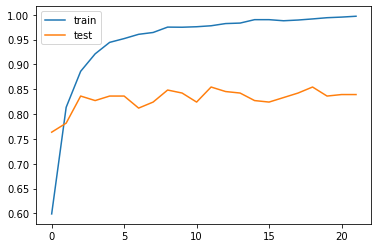

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

## **Inferencing** 

In [ ]:
# load the most accurate model, following val_acc curve
model.load_weights('aspect_based_sa.h5')

label_map = {
    0:'Negative',
    1: 'Neutral',
    2:'Positive'
}
string_input_1 = tf.keras.Input(shape=(20,), dtype="string")
string_input_2 = tf.keras.Input(shape=(2,), dtype="string")


inp_str = 'the service was worst , but ambience was amazing'

print('Input String : ', inp_str)

x = tokenizer.texts_to_sequences([inp_str.split(' ')])
x = tf.keras.preprocessing.sequence.pad_sequences(x, maxlen=20)

x1 = tokenizer.texts_to_sequences([['ambience']])
x1 = tf.keras.preprocessing.sequence.pad_sequences(x1, maxlen=2)

print('*'*30,'aspect-term : ambience', '*'*30)

preds = model.predict([x,x1])


print(label_map[np.argmax(preds)])


x1 = tokenizer.texts_to_sequences([['service']])
x1 = tf.keras.preprocessing.sequence.pad_sequences(x1, maxlen=2)
preds = model.predict([x,x1])
print('*'*30,'aspect-term : service', '*'*30)
print(label_map[np.argmax(preds)])

Input String :  the service was worst , but ambience was amazing
****************************** aspect-term : ambience ******************************


1/1 [==============================] - 1s 1s/step
Positive
1/1 [==============================] - 0s 23ms/step
****************************** aspect-term : service ******************************
Negative


## **Attention Visualization**

In [ ]:
attention_model = tf.keras.Model(inputs=model.input, outputs=[model.output, model.get_layer('attention').output, model.input])

In [ ]:
def plot_attention(target):

  # plot attention curve

  #define input output
  x1 = tokenizer.texts_to_sequences([[target]])
  x1 = tf.keras.preprocessing.sequence.pad_sequences(x1, maxlen=2)

  preds = model.predict([x,x1])

  #prediction
  print('*'*30,f'aspect-term : {target}', '*'*30)
  print(label_map[np.argmax(preds)])

  # attention weight extraction from model parameters
  outputs = attention_model.predict([x,x1])
  model_outputs = outputs[0]
  attention_outputs = outputs[1]

  # txt extraxtion
  txt = outputs[2][0][0].tolist()
  txt = [tokenizer.sequences_to_texts([[txt[i]]]) for i in range(20)]
  txt = [''.join(i) for i in txt]
  att_weights = attention_outputs[1].reshape(1,-1).tolist()[0]

  #visualization
  plt.figure(figsize=(10.5, 7.5))
  query_df = pd.DataFrame(att_weights, index = txt, columns = [target])
  query_df.drop(index=(''), inplace = True)
  ax = sns.heatmap(query_df, annot=True, cmap=sns.light_palette("blue", as_cmap=True, ), linewidths=1, ).set_title('predicted')

1/1 [==============================] - 0s 22ms/step
****************************** aspect-term : service ******************************
Negative


1/1 [==============================] - 1s 959ms/step


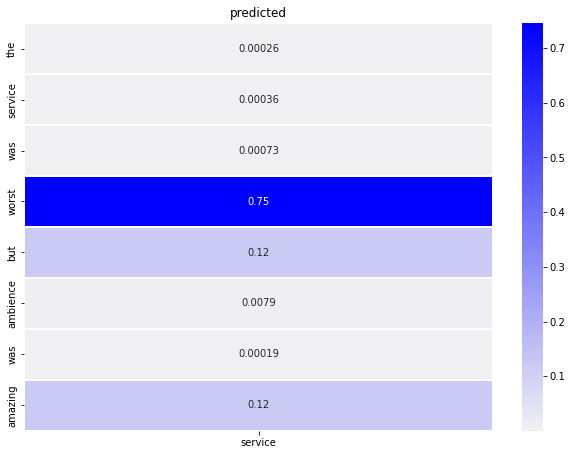

In [ ]:
plot_attention('service')

1/1 [==============================] - 0s 21ms/step
****************************** aspect-term : ambience ******************************
Positive
1/1 [==============================] - 0s 20ms/step


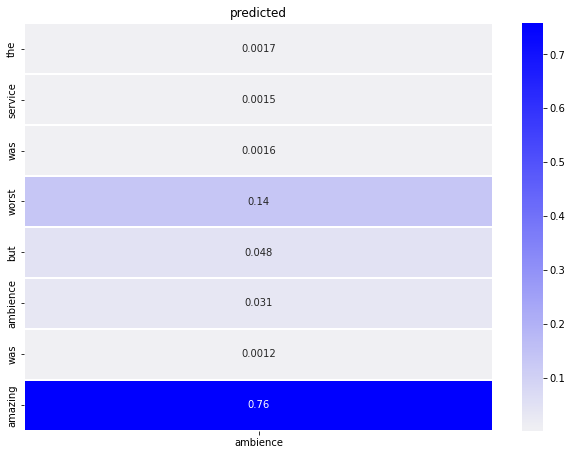

In [ ]:
plot_attention('ambience')

# **Attention Plot Analysis**

- For aspect term "Service" in above example.
- word `worst` is activated
- which cause negative sentiment prediction

-------------------------------------------------------------------
- For aspect term "ambience" in above example.
- word `amazing` is activated
- which cause positive sentiment prediction.


## **Comaprison analysis & Conclusion**



### **Explainability**

Model  | Explainability
------------------------|-----------------------------
LSTM |  Not possible
LSTM + ATTN |  possible to visualize


### **Performance**

Model  | accuracy
------------------------|-----------------------------
LSTM |  72 %
LSTM + ATTN |  84 %

## **Importance of Attention Mechanisms in training Popular  NLP Model**

* helps in learning good contexual representation of a text
* Adding Explainability
* helps in performance improvement
* Facilitates transfer learning


## **TRANSFORMERS**
- Language translation Model
- based on `MULTI-HEAD SELF-ATTENTION MECHANISMS`
- Get rid of recurrent architecture to understand text 

## **BERT**

- Popular Language Model
- helps text to get good contexualised representation of text
- transfer learning 
- based on `MULTI-HEAD SELF-ATTENTION MECHANISMS`


